In [2]:
import networkx as nx
import numpy as np
import pandas as pd
import random
from random import sample
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

pd.options.mode.chained_assignment = None  

In [2]:
data = np.loadtxt("metadata_ICCSS17.dat", delimiter='\t',dtype='str')

In [3]:
df = pd.DataFrame(data, 
    columns=['ID', 'Age', 'Gender', 'Country', 'Language', 'Seniority', 'Background', 'Role', 'Past Participation'], 
    dtype='str')

## Data Analysis

__Relabeling 'Number' as 'Character' in each Attribute__

In [4]:
# #### Relabeling Number as Character in each Attribute ###
df['Country'][df['Country'] == 'other']   = 'C_oth'
df['Language'][df['Language'] == 'other'] = 'L_oth'

__CASE 1 - Delete 'NA' entire rows (EXCEPT partial NA)__

In [5]:
df      = df.replace('NA',np.nan)## Drop the rows with all NaN (EXCEPT partial NA)
df_noID = df.drop(columns='ID')  ## Delete 'ID' number on 0th col
df_partial = df_noID.dropna(axis=0, how='all') ## Delete 'NA' EXCEPT in PARTIAL-cols 
df_partial.insert(0, 'ID', df_partial.index)   ## Refill ID-index

# df_partial = pd.DataFrame(df_partial).to_numpy()
df_partial.shape #,df_partial[105:107]

(202, 9)

In [6]:
df_partial.index  ## df_partial.ID

Int64Index([  0,   1,   2,   3,   5,   7,   8,  10,  11,  12,
            ...
            246, 248, 249, 251, 252, 253, 254, 258, 259, 260],
           dtype='int64', length=202)

__CASE 2 - Delete 'NA' entire rows (AND Delete partial NA)__

In [7]:
df_noNA = df_noID.dropna(axis=0, how='any') ## Delete 'NA' ALL-cols AND PARTIAL-cols 
df_noNA.insert(0, 'ID', df_noNA.index)   ## Refill ID-index
# df_noNA = pd.DataFrame(df_noNA).to_numpy()
df_noNA.shape #, df_noNA[0:5]

(188, 9)

__CASE 3 - MODE Imputation (on Partial NA)__

In [8]:
df_mode_imp = df_partial.copy()

# Simple Imputation: Mode
df_mode_imp['Age']       = df_mode_imp['Age'].fillna(       df_mode_imp['Age'].mode()[0]       )
df_mode_imp['Gender']    = df_mode_imp['Gender'].fillna(    df_mode_imp['Gender'].mode()[0]    )
df_mode_imp['Country']   = df_mode_imp['Country'].fillna(   df_mode_imp['Country'].mode()[0]   )
df_mode_imp['Language']  = df_mode_imp['Language'].fillna(  df_mode_imp['Language'].mode()[0]  )
df_mode_imp['Seniority'] = df_mode_imp['Seniority'].fillna( df_mode_imp['Seniority'].mode()[0] )
df_mode_imp['Background']= df_mode_imp['Background'].fillna(df_mode_imp['Background'].mode()[0])
df_mode_imp['Role']      = df_mode_imp['Role'].fillna(      df_mode_imp['Role'].mode()[0]      )
df_mode_imp['Past Participation']= df_mode_imp['Past Participation'].fillna(df_mode_imp['Past Participation'].mode()[0])

# df_mode_imp = pd.DataFrame(df_mode_imp).to_numpy()                     # .to_numpy(str)

print(
'Before IMPUT:',df_partial['Country'].isna().sum(),'\n',
                df_partial['Country'][105:110], '\n\n',
'After IMPUT:' ,df_mode_imp['Country'][105:110], df_mode_imp.shape ) 

Before IMPUT: 12 
 135      NaN
136      NaN
137       C1
138    C_oth
139      NaN
Name: Country, dtype: object 

 After IMPUT: 135    C_oth
136    C_oth
137       C1
138    C_oth
139    C_oth
Name: Country, dtype: object (202, 9)


 ***

__Chossing the data Attribute__: (from Mode Imputation)

__1) Age__

In [9]:
####### 1) Age Attribute #######
Age     = df_mode_imp['Age']#.values
Age_ind = df_mode_imp['Age'].index

A0 = df_mode_imp['Age'][df_mode_imp['Age'] == '0'] 
A1 = df_mode_imp['Age'][df_mode_imp['Age'] == '1'] 
A2 = df_mode_imp['Age'][df_mode_imp['Age'] == '2'] 
A3 = df_mode_imp['Age'][df_mode_imp['Age'] == '3'] 

n_A0, n_A1, n_A2, n_A3 = len(A0), len(A1), len(A2), len(A3)

print(A3[0:3],'\nNum of Nodes in group (n_i):\n', n_A0, n_A1, n_A2, n_A3)
print('Num of Possible Links (N_ij):\n', 
        'N_A00 = ',len(A0)*(len(A0) - 1)/2,'\n',
        'N_A11 = ',len(A1)*(len(A1) - 1)/2,'\n',
        'N_A22 = ',len(A2)*(len(A2) - 1)/2,'\n',
        'N_A33 = ',len(A3)*(len(A3) - 1)/2)

13    3
21    3
22    3
Name: Age, dtype: object 
Num of Nodes in group (n_i):
 55 101 31 15
Num of Possible Links (N_ij):
 N_A00 =  1485.0 
 N_A11 =  5050.0 
 N_A22 =  465.0 
 N_A33 =  105.0


In [10]:
A0[0:4].index, A1[0:4].index,   A0.index.shape, A1.index.shape,\
A0[0:5].values, A1[0:5].values

(Int64Index([7, 8, 14, 18], dtype='int64'),
 Int64Index([1, 2, 3, 10], dtype='int64'),
 (55,),
 (101,),
 array(['0', '0', '0', '0', '0'], dtype=object),
 array(['1', '1', '1', '1', '1'], dtype=object))

__2) Seniortiy__

In [11]:
####### 2) Seniority Attribute #######
Seni     = df_mode_imp['Seniority']
Seni_ind = df_mode_imp['Seniority'].index

S1 = df_mode_imp['Seniority'][df_mode_imp['Seniority'] =='1'] ## 1: Bachelor/Master student
S2 = df_mode_imp['Seniority'][df_mode_imp['Seniority'] =='2'] ## 2: PhD student
S3 = df_mode_imp['Seniority'][df_mode_imp['Seniority'] =='3'] ## 3: Postdoctoral researcher
S4 = df_mode_imp['Seniority'][df_mode_imp['Seniority'] =='4'] ## 4: Junior/Assistant professor
S5 = df_mode_imp['Seniority'][df_mode_imp['Seniority'] =='5'] ## 5: Associate/Full professor
S6 = df_mode_imp['Seniority'][df_mode_imp['Seniority'] =='6'] ## 6: Other (industry/staff)

S23 = S2.append(S3) ## 23 : PhD + Post.doc
S45 = S4.append(S5) ## 45 : Asst+ Asso.Full Prof.

n_S1, n_S23, n_S45, n_S6 = len(S1), len(S23), len(S45), len(S6)

S1[0:3], S23[0:3], S45[0:3], S6[0:3],\
n_S1, n_S23, n_S45, n_S6

(25    1
 30    1
 46    1
 Name: Seniority, dtype: object, 2    2
 7    2
 8    2
 Name: Seniority, dtype: object, 1     4
 12    4
 32    4
 Name: Seniority, dtype: object, 11     6
 71     6
 134    6
 Name: Seniority, dtype: object, 16, 113, 59, 14)

__3) Background__

In [12]:
####### 3) Background Attribute #######
Backgr     = df_mode_imp['Background']
Backgr_ind = df_mode_imp['Background'].index

B1 = df_mode_imp['Background'][df_mode_imp['Background'] =='1'] ## 1: Social/ Pol/ Behavior Sci.
B2 = df_mode_imp['Background'][df_mode_imp['Background'] =='2'] ## 2: Com/ Info. Sci.
B3 = df_mode_imp['Background'][df_mode_imp['Background'] =='3'] ## 3: Math / Phy / Bio
B4 = df_mode_imp['Background'][df_mode_imp['Background'] =='4'] ## 4: Med / Commun / Ling
B5 = df_mode_imp['Background'][df_mode_imp['Background'] =='5'] ## 5: other

# B23 = B2.append(B3) ## 23 : Com.Sci + Math/Phy/Bio
B45 = B4.append(B5)   ## 45 : Med / Commun / Ling + Other

n_B1, n_B2, n_B3, n_B45 = len(B1), len(B2), len(B3), len(B45)

B1[0:3], B2[0:3], B3[0:3], B45[0:3],\
n_B1,  n_B2, n_B3, n_B45

(0    1
 1    1
 2    1
 Name: Background, dtype: object, 5     2
 7     2
 10    2
 Name: Background, dtype: object, 3     3
 8     3
 11    3
 Name: Background, dtype: object, 38     4
 74     4
 109    4
 Name: Background, dtype: object, 61, 76, 48, 17)

__4) Gender__

In [13]:
####### 3) Gender Attribute #######
Gender     = df_mode_imp['Gender']
Gender_ind = df_mode_imp['Gender'].index

G1 = df_mode_imp['Gender'][df_mode_imp['Gender'] =='M'] ## 1: Male
G2 = df_mode_imp['Gender'][df_mode_imp['Gender'] =='F'] ## 2: Female

n_G1, n_G2 = len(G1), len(G2)

G1[0:3], G2[0:3],\
n_G1,  n_G2

(0    M
 2    M
 3    M
 Name: Gender, dtype: object, 1     F
 7     F
 10    F
 Name: Gender, dtype: object, 141, 61)

__5) Country__

In [14]:
####### 5) Country Attribute #######
Country     = df_mode_imp['Country']
Country_ind = df_mode_imp['Country'].index

C1 = df_mode_imp['Country'][df_mode_imp['Country'] =='C1'] ## 1: Country 1
C2 = df_mode_imp['Country'][df_mode_imp['Country'] =='C2'] ## 2: Country 2
C3 = df_mode_imp['Country'][df_mode_imp['Country'] =='C3'] ## 3: Country 3
C4 = df_mode_imp['Country'][df_mode_imp['Country'] =='C4'] ## 4: Country 4
C5 = df_mode_imp['Country'][df_mode_imp['Country'] =='C_oth'] ## 5: other countries

C45 = C4.append(C5)


n_C1, n_C2, n_C3, n_C4 = len(C1), len(C2), len(C3), len(C4)
n_C45 = len(C45)
    
C1[0:3], C2[0:3], C3[:3], C45[:3],\
n_C1, n_C2, n_C3, n_C4,\
n_C45

(0     C1
 11    C1
 14    C1
 Name: Country, dtype: object, 32    C2
 39    C2
 43    C2
 Name: Country, dtype: object, 1     C3
 3     C3
 18    C3
 Name: Country, dtype: object, 12    C4
 17    C4
 30    C4
 Name: Country, dtype: object, 55, 42, 18, 10, 87)

__6) Language__

In [15]:
####### 6) Language Attribute #######
Language     = df_mode_imp['Language']
Language_ind = df_mode_imp['Language'].index

L1 = df_mode_imp['Language'][df_mode_imp['Language'] =='L1'] ## 1: Language 1
L2 = df_mode_imp['Language'][df_mode_imp['Language'] =='L2'] ## 2: Language 2
L3 = df_mode_imp['Language'][df_mode_imp['Language'] =='L3'] ## 3: Language 3
L4 = df_mode_imp['Language'][df_mode_imp['Language'] =='L4'] ## 4: Language 4
L5 = df_mode_imp['Language'][df_mode_imp['Language'] =='L5'] ## 5: Language 5
L6 = df_mode_imp['Language'][df_mode_imp['Language'] =='L_oth'] ## 6: other Language

L34 = L3.append(L4)
L56 = L5.append(L6)


n_L1, n_L2, n_L3, n_L4, n_L5, n_L6 = len(L1), len(L2), len(L3), len(L4), len(L5), len(L6)

n_L34 = len(L34)
n_L56 = len(L56)
    
    
L1[0:3], L2[0:3], L34[:3], L56[:3],\
n_L1, n_L2, n_L3, n_L4, n_L5, n_L6,\
n_L34, n_L56

(0     L1
 3     L1
 14    L1
 Name: Language, dtype: object, 2     L2
 8     L2
 18    L2
 Name: Language, dtype: object, 5     L3
 11    L3
 21    L3
 Name: Language, dtype: object, 12    L5
 17    L5
 30    L5
 Name: Language, dtype: object, 49, 43, 21, 15, 10, 64, 36, 74)

__7) Role__

In [16]:
####### 7) Role Attribute #######
Role     = df_mode_imp['Role']
Role_ind = df_mode_imp['Role'].index

R1 = df_mode_imp['Role'][df_mode_imp['Role'] =='1'] ## 1: Speaker
R2 = df_mode_imp['Role'][df_mode_imp['Role'] =='2'] ## 2: Poster presenter
R3 = df_mode_imp['Role'][df_mode_imp['Role'] =='3'] ## 3: Participation only
R4 = df_mode_imp['Role'][df_mode_imp['Role'] =='4'] ## 4: Staff

n_R1, n_R2, n_R3, n_R4 = len(R1), len(R2), len(R3), len(R4)
    
R1[0:3], R2[0:3], R3[:3], R4[:3],\
n_R1, n_R2, n_R3, n_R4

(1    1
 3    1
 5    1
 Name: Role, dtype: object, 2     2
 7     2
 16    2
 Name: Role, dtype: object, Series([], Name: Role, dtype: object), 0     4
 58    4
 71    4
 Name: Role, dtype: object, 143, 44, 0, 15)

__Indexing the attribute data__ 

In [17]:
#### 1) Indexing Node: Age       ####
ind_A0_to_A3 = A0.index.append(A1.index).append(A2.index).append(A3.index)

#### 2) Indexing Node: Seniority ####
ind_S1_to_S6 = S1.index.append(S23.index).append(S45.index).append(S6.index)

#### 3) Indexing Node: Background ####
ind_B1_to_B45= B1.index.append(B2.index).append(B3.index).append(B45.index)

#### 4) Indexing Node: Gender    ####
ind_G1_to_G2 = G1.index.append(G2.index)

#### 5) Indexing Node: Country   ####
ind_C1_to_C45= C1.index.append(C2.index).append(C3.index).append(C45.index)

#### 6) Indexing Node: Language  ####
ind_L1_to_L56= L1.index.append(L2.index).append(L34.index).append(L56.index)

#### 7) Indexing Node: Role      ####
ind_R1_to_R4 = R1.index.append(R2.index).append(R3.index).append(R4.index)

__Node group clustering__ 

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


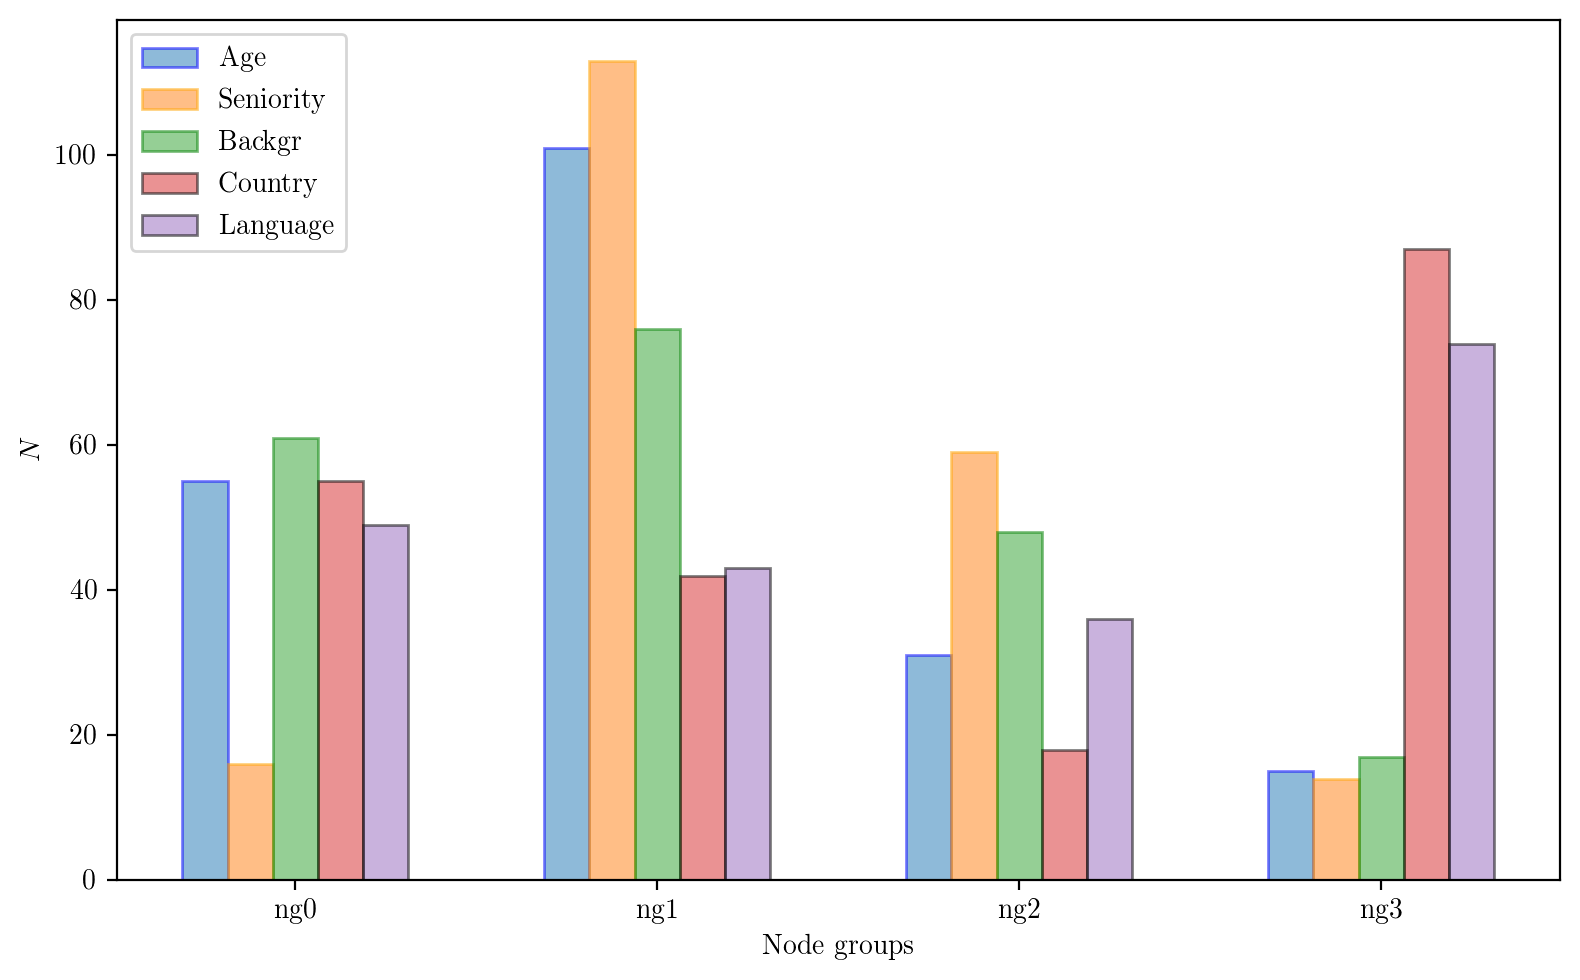

In [18]:
plt.figure(figsize=(8,5), tight_layout=True, dpi=200 )
# fig = plt.figure()
# ax  = fig.add_axes([0,0,1,1])

node_groups = np.arange(4) # node_gr : ['ng0', 'ng1', 'ng2', 'ng3']
width = .125               # width of the bars


"""#### 1) Age #### """
n_Age = [n_A0, n_A1, n_A2, n_A3]
plt.bar(node_groups, n_Age, width, label=r'Age', alpha=0.5, edgecolor='blue')


"""#### 2) Seniority #### """
n_Senior = [n_S1, n_S23, n_S45, n_S6]
plt.bar(node_groups+width, n_Senior, width ,label=r'Seniority', alpha=0.5, edgecolor='orange')


"""#### 3) Background #### """
n_Backgr = [n_B1, n_B2, n_B3, n_B45]
plt.bar(node_groups+(2*width), n_Backgr, width, label=r'Backgr', alpha=0.5, edgecolor='green')

"""#### 4) Gender #### """
n_Gender = [n_G1, n_G2, 0, 0]
# plt.bar(node_groups+(3*width), n_Gender, width, label=r'Gender', alpha=0.5, edgecolor='black')


"""#### 5) Country #### """
n_Country = [n_C1, n_C2, n_C3, n_C45]
# n_Country = [n_C1, n_C2, n_C3, n_C4]
plt.bar(node_groups+(3*width), n_Country, width, label=r'Country', alpha=0.5, edgecolor='black')


"""#### 6) Language #### """
n_Language = [n_L1, n_L2, n_L34, n_L56]
# n_Language = [n_L1, n_L2, n_L3 , n_L4]
plt.bar(node_groups+(4*width), n_Language, width, label=r'Language', alpha=0.5, edgecolor='black')


# """#### 7) Role #### """
# n_Role = [n_R1, n_R2, n_R3, n_R4]
# plt.bar(node_groups+(5*width), n_Role, width, label=r'Role', alpha=0.5, edgecolor='black')


plt.xticks(node_groups + width*2, ['ng0', 'ng1', 'ng2', 'ng3'] )
plt.legend(loc='best')
plt.ylabel(r'$N$')
plt.xlabel(r'Node groups')
# plt.savefig('node_gr_cluster_hist.pdf')
plt.show()

### Temporal node Data

In [19]:
data_tem = np.loadtxt("tij_ICCSS17.dat", delimiter='\t',dtype=float)

In [20]:
df_tem = pd.DataFrame(data_tem, 
    columns=['Timepoint', 'Node i', 'Node j'], dtype=float)

df_tem_count = df_tem.groupby(['Node i', 'Node j']).size()
df_tem_count

Node i  Node j
0.0     3.0       11
        8.0        1
        21.0       1
        81.0       1
        108.0      3
                  ..
261.0   237.0      1
        238.0      1
        240.0      4
        241.0     11
        256.0      2
Length: 17327, dtype: int64

In [21]:
# df_tem_count[261].values,    sum(df_tem_count[261].values)

### Degree Extracting

__Degree of Node i__

In [22]:
K_ni = np.zeros([len(df)], dtype=int)

for i in range(len(df)):
    K_ni[i] = np.sum(df_tem_count[i])

K_ni = dict(enumerate(K_ni))

### Homophily Matrix

In [23]:
def HA(h, ε): ## Homophily matrix h_αβ
    """
    Homophily Matrix  h_αβ : 4x4 symmetric matrix, (given sum each row = 1)            
        h = homophily parameter
        ε = heterophily parameter
    
    """
    h00 = h11 = h22 = h33    = round(h, 3)
    h20 = h21 = h30 = h31    = round(ε, 3)
    h10 = h32                = round(1-h - 2.*ε, 3)

    HA =np.array([ [h00, h10, h20, h30],
                   [h10, h11, h21, h31],
                   [h20, h21, h22, h32],
                   [h30, h31, h32, h33]])
    
    print('homophily parameter h=%.3f'%h,
          '\nheterophily parameter ε=%.3f'%ε )
#     print('Homophily matrix (h_ab):\n',HA)
    
    return HA

In [24]:
h = 0.95  # Homophily parameter
ε = 0.01  # Heterophily parameter

#### Homophily   : h -> 1.0  and  ε --> 0 ####
h_ab_homo = HA(h=0.95, ε=0.01)

#### Homo-mixed  : h -> 0.5  and ε = (0, 0.25) ####
h_ab_mix  = HA(h=0.25, ε=0.25)

#### Heterophily : h -> 0.0  and ε = (0, 0.5) ####
h_ab_het  = HA(h=0.001,ε=0.333)

homophily parameter h=0.950 
heterophily parameter ε=0.010
homophily parameter h=0.250 
heterophily parameter ε=0.250
homophily parameter h=0.001 
heterophily parameter ε=0.333


In [25]:
# #### Homophily   : h -> 1.0  and  ε --> 0 ####
# h = 0.95
# ε = 0.01
# # h = 0.95
# # ε = 0.025
# # h = 0.997
# # ε = 0.001
# # h = 0.6
# # ε = 0.15
# #### Homo-mixed  : h -> 0.5  and ε = (0, 0.25) ####
# # h = 0.25
# # ε = 0.25
# # h = 0.3
# # ε = 0.2
# #### Heterophily : h -> 0.0  and ε = (0, 0.5) ####
# # h = 0.001
# # ε = 0.333
# # h = 0.001
# # ε = 0.499

__Random Partition Graph__

In [26]:
def random_partition_graph(node_gr, h, ε):
    """ node_gr = node groups  (constrained only 4 node clusters)
        h       = homophily parameter
        ε       = heterophily parameter
        Gp      = random partition network 
    """
    p_within = h  # Probability between groups
    p_bet    = ε  # Probability within groups
    
    # Randomize Partition node groups : 4 node clusters
    Gp = nx.random_partition_graph(node_gr, p_within, p_bet)
    gr_partition = Gp.graph["partition"]
    
    # Plot the random (cluster) network 
    pos= nx.spring_layout(Gp)
    nx.draw(Gp, pos, with_labels=False, 
                node_color=range(Gp.number_of_nodes()), cmap=plt.cm.Greens, 
                edge_color=range(Gp.number_of_edges()), edge_cmap=plt.cm.Greens )
    
    print('Random partition graph \n',
         '#N=',Gp.number_of_nodes(),'#E=',Gp.number_of_edges(),'#non-E=',len(list(nx.non_edges(Gp))),'#Node_gr=',len(gr_partition) )
    
    plt.show()

    return Gp 

/Users/udomlerd/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/udomlerd/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
/Users/udomlerd/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):


Random partition graph 
 #N= 202 #E= 6871 #non-E= 13430 #Node_gr= 4


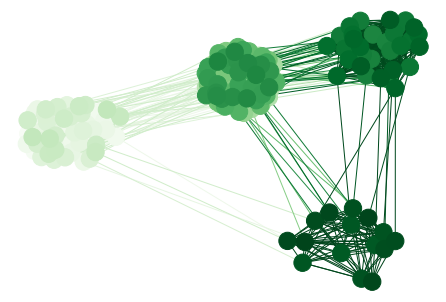

In [27]:
n_Age     = [n_A0, n_A1, n_A2, n_A3]
n_Senior  = [n_S1, n_S23, n_S45, n_S6]
n_Backgr  = [n_B1, n_B2, n_B3, n_B45]
n_Gender  = [n_G1, n_G2, 0, 0]
n_Country = [n_C1, n_C2, n_C3, n_C45]
n_Language= [n_L1, n_L2, n_L34, n_L56]
n_Role    = [n_R1, n_R2, n_R3, n_R4]


Gp_A = random_partition_graph(n_Age, h, ε)

### Probability of connecting to node i

Homophily probability of _one node_ ${i}$ connecting from node $j$ (from all links $l$) between group $\alpha$ and $\beta$ is expressed as

\begin{equation}
    \pi_{i} =
    \dfrac{h_{\alpha\beta}(i, j) k_{i}}
    {\displaystyle\sum_{l} h_{\lambda\beta }(l, j) k_{l} },
    \label{eq:1}
\end{equation}

__Sum connecting edges in homophily parameter h__


This cell is to compute homophily parameter between nodes in the random partition network. For simplicity, we take homophily parameter $h$ as a weight of the edge between two nodes.


To assign homophily parameter $h$, it needs to cluster the nodes $i$ and nodes $j$ whether they belong to which node group.

     Ex: node0 (gr α)  connecting  node1 (gr. α)  :  h -> 1.
         node0 (gr α)  connecting  node2 (gr. β)  :  h -> 0.

After we extract the degree of node $k$ from previous section from temporal data, we may compute the product of homophily parameter and degree ($hk$) in random partition network.

This cell is one part of the computation of probability homophily for a node ($\pi_{i}$)

In [28]:
def sum_hk_node_gr(Gp, HA):
    """  hk       = product of homophily parameter h & degree k 
         Gp       = Random partition network
         Node_gra = node group a
         Node_grb = node group b
    """
    hki     , hkj      = [], []   # hk product of node i, j
    Node_gra, Node_grb = [], []   
    sum_hk_i, sum_hk_j = 0., 0. 

    for ne in Gp.edges.data():
        """ne[0] == Node i     ne[1] == Node j    ne[2] == weight 
            let   'weight' =  Homophily between i & j node 
                  'weight' =  h_ij
        """
#         print('####',ne[0], ne[1],'####')
        ne0 = ne[0]  # Node i
        ne1 = ne[1]  # Node j

        """Grouping the node groups of all nodes i,j"""
        #### Node Group ####
        for ng in range(len(Gp.graph["partition"])):
            ### Nodes i ###
            for ni in Gp.graph["partition"][ng]:
                if ne0 == ni:   # If node i is inside node group α 
                    ng_a = ng   # Assign node i inside node group α
#                     print('node_i=',ne0,'k_i=',K_ni[ne0],'\tgr_i=',ng_a) #print('node_i=',ne0,'k_i=',lKp[ne0],'\tgr_i=',ng_a)
            ### Nodes j ###
            for nj in Gp.graph["partition"][ng]:
                if ne1 == nj:   # If node j is inside node group β
                    ng_b = ng   # Assign node j inside node group β
    #                 print('node_j=',ne1,'k_j=',K_ni[ne1],'\tgr_j=',ng_b)

        ### Homophily Matrix element ###   
    #     print('Node gr=(',ng_a,ng_b,') \tHA=', HA[ng_a][ng_b] )

        ### Assign Weight as Homophily parameter among gr. α & gr. β ###
        Gp[ne[0]][ne[1]]['weight'] = HA[ng_a][ng_b]
    #     print('h_%i%i'%(ng_a,ng_b),'=',Gp[ne[0]][ne[1]]['weight'])

        ### Compute the product hk of connecting node i or node j ###    
        hk_i = HA[ng_a][ng_b]* K_ni[ne0]    ##                    
        hk_j = HA[ng_a][ng_b]* K_ni[ne1]                        

        hki.append(hk_i);      hkj.append(hk_j)
        Node_gra.append(ng_a); Node_grb.append(ng_b)
    #     print('\thk_i= %.3f'%hk_i ,'\thk_j= %.3f'%hk_j )

        ### Sum of hk Product ###
        sum_hk_i +=  hk_i
        sum_hk_j +=  hk_j
    #     print('\tΣhk_i= %.3f'%sum_hk_i ,'\tΣhk_j= %.3f'%sum_hk_i )

    
    """Grouping the node groups"""
    Node_gra = np.array(Node_gra)
    Node_grb = np.array(Node_grb)
    
    ### Group α ###
    print("Number of node i in Node groups α : ",
    len(Node_gra[Node_gra == 0]), len(Node_gra[Node_gra == 1]),\
    len(Node_gra[Node_gra == 2]), len(Node_gra[Node_gra == 3]))
    ### Group β ###
    print( "Number of node j in Node groups β : ",
    len(Node_grb[Node_grb == 0]), len(Node_grb[Node_grb == 1]),\
    len(Node_grb[Node_grb == 2]), len(Node_grb[Node_grb == 3]))
    
    
    return  hki, hkj, sum_hk_i, sum_hk_j, Node_gra, Node_grb

In [29]:
hki, hkj, sum_hk_i, sum_hk_j,\
Node_gra, Node_grb              = sum_hk_node_gr(Gp_A, HA(h, ε))

homophily parameter h=0.950 
heterophily parameter ε=0.010
Number of node i in Node groups α :  1473 4845 453 100
Number of node j in Node groups β :  1415 4834 499 123


__Probabilities in each group__

The probability of nodes assigned in node groups $\alpha$ ($P_{\alpha}$) is defined as the summmation of all homophily probability of _nodes_ ${i}$ within group $\alpha$.

\begin{equation}
     P_{\alpha} = \bigg{(}\sum_{i}\pi_{i}\bigg{)}_{\alpha}
\end{equation}

In [30]:
def prob_gr(hki, hkj, sum_hk_i, sum_hk_j, Node_gra, Node_grb):
    """
        Pa = Probability in gr. α  (gr.0 to gr.3)
        Pb = Probability in gr. β  (gr.0 to gr.3)
    """
    
    Pa_0, Pa_1, Pa_2, Pa_3 = 0.,0.,0.,0.
    Pb_0, Pb_1, Pb_2, Pb_3 = 0.,0.,0.,0.
    
    ### Number of node in groups α of all nodes i  ###
    n_gra_0 = len(Node_gra[Node_gra == 0])
    n_gra_1 = len(Node_gra[Node_gra == 1]) 
    n_gra_2 = len(Node_gra[Node_gra == 2]) 
    n_gra_3 = len(Node_gra[Node_gra == 3]) 

    n_gra_01  = n_gra_0 + n_gra_1
    n_gra_012 = n_gra_0 + n_gra_1 + n_gra_2
    
    ### Number of node in groups β of all nodes i  ###
    n_grb_0 = len(Node_grb[Node_grb == 0])
    n_grb_1 = len(Node_grb[Node_grb == 1])
    n_grb_2 = len(Node_grb[Node_grb == 2])
    n_grb_3 = len(Node_grb[Node_grb == 3])

    n_grb_01  = n_grb_0 + n_grb_1
    n_grb_012 = n_grb_0 + n_grb_1 + n_grb_2

    """#### Probability in groups of all nodes i ####"""
    ### Group_α 0 ###
    for i in range(len(hki[:n_gra_0])): 
        Pa_0 += hki[i]/sum_hk_i
    ### Group_α 1 ###
    for i in range(len(hki[ n_gra_0  : n_gra_01 ])): 
        Pa_1 += hki[i]/sum_hk_i
    ### Group_α 2 ###
    for i in range(len(hki[ n_gra_01 : n_gra_012])): 
        Pa_2 += hki[i]/sum_hk_i
    ### Group_α 3 ###
    for i in range(len(hki[ n_gra_012: len(Node_gra)])): 
        Pa_3 += hki[i]/sum_hk_i

    """#### Probability in groups of all nodes j ####"""
    ### Group_β 0 ###
    for j in range(len(hkj[:n_grb_0])): 
        Pb_0 += hkj[j]/sum_hk_j
    ### Group_β 1 ###
    for j in range(len(hkj[ n_grb_0  : n_grb_01 ])): 
        Pb_1 += hkj[j]/sum_hk_j
    ### Group_β 2 ###
    for j in range(len(hkj[ n_grb_01 : n_grb_012])): 
        Pb_2 += hkj[j]/sum_hk_j
    ### Group_β 3 ###
    for j in range(len(hkj[ n_grb_012: len(Node_grb)])): 
        Pb_3 += hkj[j]/sum_hk_j    

#     print("Prob in gr. α: ",Pa_0,Pa_1,Pa_2,Pa_3)
#     print("Prob in gr. β: ",Pb_0,Pb_1,Pb_2,Pb_3)
    
    Pa = np.array([Pa_0,Pa_1,Pa_2,Pa_3])
    Pb = np.array([Pb_0,Pb_1,Pb_2,Pb_3])
    
    return Pa, Pb

In [31]:
Pa, Pb  = prob_gr(hki, hkj, sum_hk_i, sum_hk_j, Node_gra, Node_grb)
Pa, Pb

(array([0.21418344, 0.73826846, 0.07852912, 0.01986313]),
 array([0.19323847, 0.70652915, 0.07636422, 0.02102752]))

__Geometric mean of Probabilities__

Geometric mean for probabilities is defined (Dietrich \& List, 2014).

\begin{equation}
    \hat{p} = \dfrac{\prod_{i=1}^{N} p_{i}^{w_{i}}}{\prod_{i=1}^{N} p_{i}^{w_{i}} + \prod_{i=1}^{N} (1- p_{i})^{w_{i}}}
\end{equation}

Given 𝑤𝑖 = weights, In most cases equal weights 𝑤𝑖=1/𝑁, In this case, we consider two probabilities for geometric mean (𝑁 = 2) for two main groups. Our probabilities are defined.

__$P_{αβ}$ = geometric mean probabilities between all nodes i in group α ($P_α$) and nodes j in group β ($P_β$)__


\begin{equation}
P_{\alpha\beta} = 
        \dfrac{(P_{\alpha} P_{\beta})^{1/2}}
              {(P_{\alpha} P_{\beta})^{1/2} +
            [(1-P_{\alpha})(1-P_{\beta})]^{1/2} }
\end{equation}

In [32]:
def p_geo_mean(p_gr_a,p_gr_b):
    return (p_gr_a*p_gr_b)**(1/2) / ( (p_gr_a*p_gr_b)**(1/2) + ( (1-p_gr_a) *(1-p_gr_b))**(1/2) )

### Homophily Probability 

__Probability of all nodes i within group α__
- __$P_{\alpha}$ = Σ$_{i}$ $(π_{i})_{\alpha}$__

__Mean Probability within/between groups__

- __$P_{αβ}$ = Homophily Probability within or between groups $\alpha, \beta$ (i.e. mean probability on gr. α & gr. β )__

__Mean probability between P_α - P_β__

In [33]:
def Prob_mean_gr(Pa, Pb):
    P_ab = np.zeros([4,4])

    P_ab[0][0] = p_geo_mean(Pa[0],Pb[0])
    P_ab[1][1] = p_geo_mean(Pa[1],Pb[1])
    P_ab[2][2] = p_geo_mean(Pa[2],Pb[2])
    P_ab[3][3] = p_geo_mean(Pa[3],Pb[3])

    P_ab[1][0] = p_geo_mean(Pa[1],Pb[0])
    P_ab[2][0] = p_geo_mean(Pa[2],Pb[0])
    P_ab[3][0] = p_geo_mean(Pa[3],Pb[0])

    P_ab[2][1] = p_geo_mean(Pa[2],Pb[1])
    P_ab[3][1] = p_geo_mean(Pa[3],Pb[1])
    P_ab[3][2] = p_geo_mean(Pa[3],Pb[2])

    P_ab[0][1] = P_ab[1][0] 
    P_ab[0][2] = P_ab[2][0] 
    P_ab[0][3] = P_ab[3][0] 

    P_ab[1][2] = P_ab[2][1] 
    P_ab[1][3] = P_ab[3][1] 
    P_ab[2][3] = P_ab[3][2] 

    print('Prob in/bet gr. (P_ab)=\n',P_ab,'\n')
    
    return P_ab

In [34]:
P_ab = Prob_mean_gr(Pa, Pb)

Prob in/bet gr. (P_ab)=
 [[0.20351043 0.45114204 0.12501179 0.06513348]
 [0.45114204 0.72267854 0.31174845 0.18092094]
 [0.12501179 0.31174845 0.07743974 0.0393235 ]
 [0.06513348 0.18092094 0.0393235  0.0204372 ]] 



## Stochastic Block model

A Graph generated from a stochastic block model (SBM) has 𝑘
clusters, and a 𝑘×𝑘 (symmetric) matrix 𝑃 of probabilities, 

where __𝑃_ab is the probability that a pair of nodes (i,j)
will be joined by an edge 
if i is in cluster a
and j is in cluster b__.

__Main network__

In [35]:
def main_rand_network_prob(attri_name, n_gr, h, ε):
    """ This Main function is to 
            i)  cluster the random network, given assigned node groups, homophily & heterophily parameters
            ii) compute Probability homophily in/between gr. (in 4x4 symmetric form)
    
        Gp         = Random partition network 
        attri_name = Name of attribute
        n_gr       = node groups (per one attribute)
        h,ε        = homophily & heterophily parameters
        P_ab       = Probability homophily in/between gr. α,β
        
        return P_ab 
    """
    # Attribute name of given node group
    print('##### Random',attri_name,'###### \n')
    
    # Homophily Matrix (h_ab)
    h_ab = HA(h,ε)
    
    # Random partition network
    Gp   = random_partition_graph(n_gr, h, ε)
    
    # Compute the product of homophily parameter (h) and degree (k). 
    # And indentify the node group a,b in each node i and node j in the network 
    hki, hkj, sum_hk_i, sum_hk_j,\
    Node_gra, Node_grb  = sum_hk_node_gr(Gp,  h_ab)
    
    # Probability in each group a, b
    Pa, Pb  = prob_gr(hki, hkj, sum_hk_i, sum_hk_j, Node_gra, Node_grb)
    
    # Mean grouping probability in/between group a, b
    P_ab = Prob_mean_gr(Pa, Pb)
    
    return P_ab

In [36]:
h = 0.95  # Homophily parameter
ε = 0.01  # Heterophily parameter

#### Homophily   : h -> 1.0  and  ε --> 0 ####
# h_ab_homo = HA(h=0.95, ε=0.01)
h_homo = 0.95
ε_homo = 0.01

#### Homo-mixed  : h -> 0.5  and ε = (0, 0.25) ####
# h_ab_mix  = HA(h=0.25, ε=0.25)
h_mix = 0.25
ε_mix = 0.25

#### Heterophily : h -> 0.0  and ε = (0, 0.5) ####
# h_ab_het  = HA(h=0.001,ε=0.333)
h_het = 0.001
ε_het = 0.333

In [37]:
n_Age     = [n_A0, n_A1, n_A2, n_A3]
n_Senior  = [n_S1, n_S23, n_S45, n_S6]
n_Backgr  = [n_B1, n_B2, n_B3, n_B45]
n_Gender  = [n_G1, n_G2, 0, 0]
n_Country = [n_C1, n_C2, n_C3, n_C45]
n_Language= [n_L1, n_L2, n_L34, n_L56]

__1) Random Network : Homophily-dominated__

- __h = 0.95, ε = 0.01__

##### Random Age ###### 

homophily parameter h=0.950 
heterophily parameter ε=0.010
Random partition graph 
 #N= 202 #E= 6840 #non-E= 13461 #Node_gr= 4


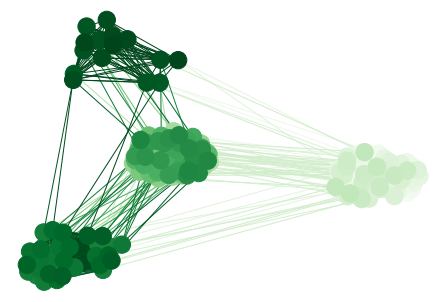

Number of node i in Node groups α :  1472 4814 451 103
Number of node j in Node groups β :  1405 4820 488 127
Prob in/bet gr. (P_ab)=
 [[0.20120098 0.4484731  0.12411521 0.06355466]
 [0.4484731  0.72101019 0.31051679 0.17742804]
 [0.12411521 0.31051679 0.07683885 0.03833658]
 [0.06355466 0.17742804 0.03833658 0.02004905]] 

##### Random Seniority ###### 

homophily parameter h=0.950 
heterophily parameter ε=0.010
Random partition graph 
 #N= 202 #E= 7948 #non-E= 12353 #Node_gr= 4


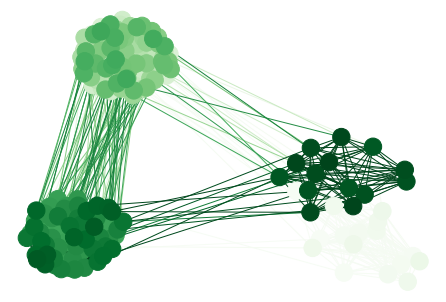

Number of node i in Node groups α :  138 6082 1640 88
Number of node j in Node groups β :  116 6007 1709 116
Prob in/bet gr. (P_ab)=
 [[0.01765968 0.19813007 0.06542688 0.01384792]
 [0.19813007 0.77120337 0.48849818 0.16076676]
 [0.06542688 0.48849818 0.21970744 0.05345943]
 [0.01384792 0.16076676 0.05345943 0.01384792]] 

##### Random Background ###### 

homophily parameter h=0.950 
heterophily parameter ε=0.010
Random partition graph 
 #N= 202 #E= 5781 #non-E= 14520 #Node_gr= 4


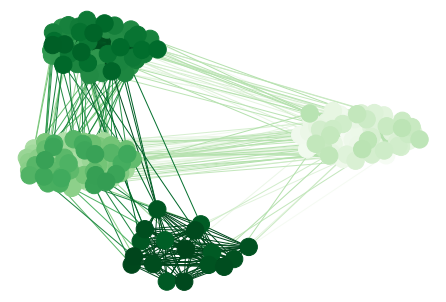

Number of node i in Node groups α :  1821 2752 1076 132
Number of node j in Node groups β :  1736 2745 1138 162
Prob in/bet gr. (P_ab)=
 [[0.31239914 0.41957583 0.26418491 0.09918438]
 [0.41957583 0.51787708 0.34790159 0.14060595]
 [0.26418491 0.34790159 0.21380289 0.07697728]
 [0.09918438 0.14060595 0.07697728 0.02871405]] 

##### Random Country ###### 

homophily parameter h=0.950 
heterophily parameter ε=0.010
Random partition graph 
 #N= 202 #E= 6039 #non-E= 14262 #Node_gr= 4


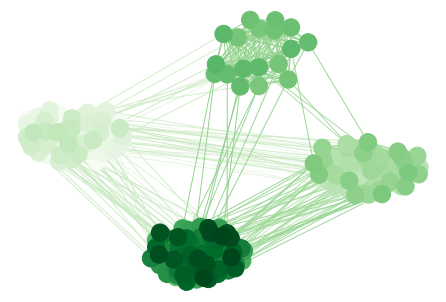

Number of node i in Node groups α :  1477 867 155 3540
Number of node j in Node groups β :  1397 845 161 3636
Prob in/bet gr. (P_ab)=
 [[0.23854876 0.20365251 0.07791629 0.38259647]
 [0.20365251 0.16523215 0.0613883  0.324159  ]
 [0.07791629 0.0613883  0.02698603 0.16901555]
 [0.38259647 0.324159   0.16901555 0.58876008]] 

##### Random Language ###### 

homophily parameter h=0.950 
heterophily parameter ε=0.010
Random partition graph 
 #N= 202 #E= 5296 #non-E= 15005 #Node_gr= 4


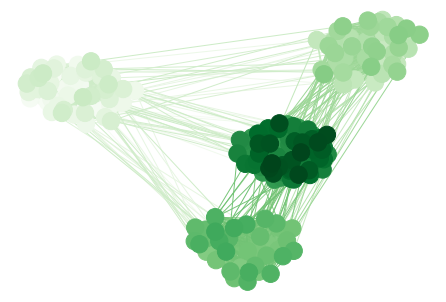

Number of node i in Node groups α :  1184 911 630 2571
Number of node j in Node groups β :  1112 877 642 2665
Prob in/bet gr. (P_ab)=
 [[0.21673004 0.20298429 0.16511839 0.34142304]
 [0.20298429 0.18440481 0.14935535 0.31518304]
 [0.16511839 0.14935535 0.13061068 0.28253901]
 [0.34142304 0.31518304 0.28253901 0.49975118]] 



In [38]:
"1) Random Age Homo"
P_ab_A_homo = main_rand_network_prob('Age' , n_Age,  h_homo, ε_homo)
"2) Random Seniority Homo"
P_ab_S_homo = main_rand_network_prob('Seniority',n_Senior,  h_homo, ε_homo)
"3) Random Background Homo"
P_ab_B_homo = main_rand_network_prob('Background',n_Backgr, h_homo, ε_homo)
"4) Random Country Homo"
P_ab_C_homo = main_rand_network_prob('Country' ,n_Country,  h_homo, ε_homo)
"5) Random Language Homo"
P_ab_L_homo = main_rand_network_prob('Language',n_Language, h_homo, ε_homo)

__2) Random Network : Homogenous-Mixing__

- __h = 0.25, ε = 0.25__

##### Random Age ###### 

homophily parameter h=0.250 
heterophily parameter ε=0.250
Random partition graph 
 #N= 202 #E= 5168 #non-E= 15133 #Node_gr= 4


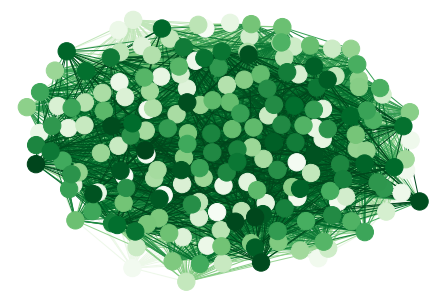

Number of node i in Node groups α :  2430 2491 214 33
Number of node j in Node groups β :  383 2700 1346 739
Prob in/bet gr. (P_ab)=
 [[0.21403695 0.22456499 0.05103479 0.00753811]
 [0.22456499 0.51512086 0.1647773  0.02710767]
 [0.05103479 0.1647773  0.09859176 0.01521227]
 [0.00753811 0.02710767 0.01521227 0.0106588 ]] 

##### Random Seniority ###### 

homophily parameter h=0.250 
heterophily parameter ε=0.250
Random partition graph 
 #N= 202 #E= 5088 #non-E= 15213 #Node_gr= 4


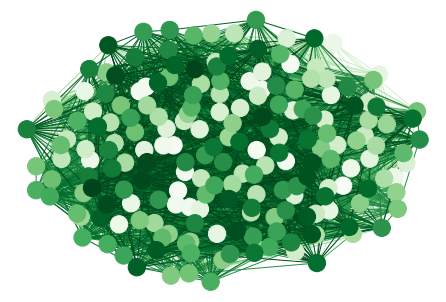

Number of node i in Node groups α :  818 3627 615 28
Number of node j in Node groups β :  34 2076 2313 665
Prob in/bet gr. (P_ab)=
 [[0.04200794 0.13160214 0.03602246 0.00213229]
 [0.13160214 0.58149367 0.25518433 0.01921525]
 [0.03602246 0.25518433 0.27406516 0.02113232]
 [0.00213229 0.01921525 0.02113232 0.00945607]] 

##### Random Background ###### 

homophily parameter h=0.250 
heterophily parameter ε=0.250
Random partition graph 
 #N= 202 #E= 5054 #non-E= 15247 #Node_gr= 4


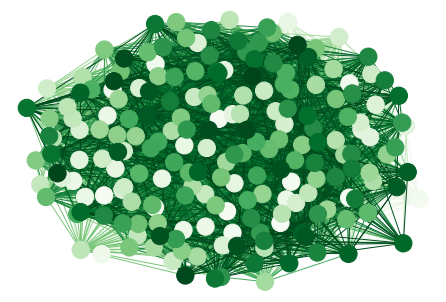

Number of node i in Node groups α :  2599 1943 488 24
Number of node j in Node groups β :  446 1935 1854 819
Prob in/bet gr. (P_ab)=
 [[0.25471479 0.20766588 0.10572047 0.00706807]
 [0.20766588 0.39193638 0.22524692 0.01720498]
 [0.10572047 0.22524692 0.21969302 0.01667039]
 [0.00706807 0.01720498 0.01667039 0.00995289]] 

##### Random Country ###### 

homophily parameter h=0.250 
heterophily parameter ε=0.250
Random partition graph 
 #N= 202 #E= 5113 #non-E= 15188 #Node_gr= 4


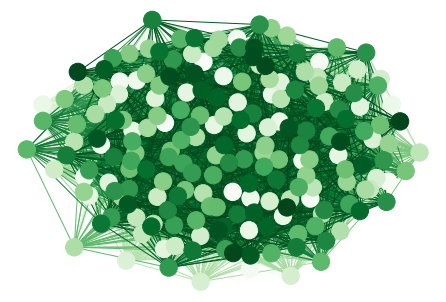

Number of node i in Node groups α :  2364 1345 435 969
Number of node j in Node groups β :  369 786 468 3490
Prob in/bet gr. (P_ab)=
 [[0.2016614  0.15414853 0.09144761 0.13770687]
 [0.15414853 0.22271738 0.13663086 0.20069742]
 [0.09144761 0.13663086 0.10409817 0.1556604 ]
 [0.13770687 0.20069742 0.1556604  0.46342855]] 

##### Random Language ###### 

homophily parameter h=0.250 
heterophily parameter ε=0.250
Random partition graph 
 #N= 202 #E= 5059 #non-E= 15242 #Node_gr= 4


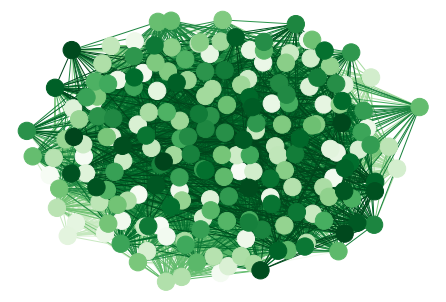

Number of node i in Node groups α :  2150 1387 838 684
Number of node j in Node groups β :  299 731 935 3094
Prob in/bet gr. (P_ab)=
 [[0.1827789  0.14732579 0.11335445 0.09963542]
 [0.14732579 0.22469277 0.176576   0.15655647]
 [0.11335445 0.176576   0.19793192 0.17600868]
 [0.09963542 0.15655647 0.17600868 0.36166674]] 



In [39]:
"1) Random Age Mix"
P_ab_A_mix = main_rand_network_prob('Age' , n_Age,  h_mix, ε_mix)
"2) Random Seniority Mix"
P_ab_S_mix = main_rand_network_prob('Seniority',n_Senior,  h_mix, ε_mix)
"3) Random Background Mix"
P_ab_B_mix = main_rand_network_prob('Background',n_Backgr, h_mix, ε_mix)
"4) Random Country Mix"
P_ab_C_mix = main_rand_network_prob('Country' ,n_Country,  h_mix, ε_mix)
"5) Random Language Mix"
P_ab_L_mix = main_rand_network_prob('Language',n_Language, h_mix, ε_mix)

__3) Random Network : Heterophily-dominated__

- __h = 0.001, ε = 0.333__

##### Random Age ###### 

homophily parameter h=0.001 
heterophily parameter ε=0.333
Random partition graph 
 #N= 202 #E= 4468 #non-E= 15833 #Node_gr= 4


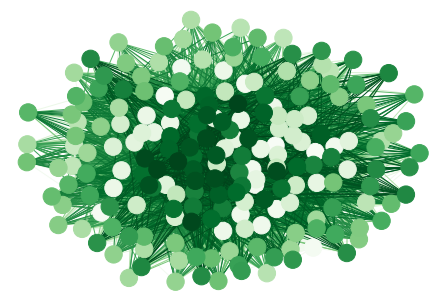

Number of node i in Node groups α :  2754 1546 168 0
Number of node j in Node groups β :  1 1895 1601 971
Prob in/bet gr. (P_ab)=
 [[0.03612749 0.02310327 0.00582996 0.        ]
 [0.02310327 0.4196556  0.1520415  0.        ]
 [0.00582996 0.1520415  0.13408528 0.        ]
 [0.         0.         0.         0.        ]] 

##### Random Seniority ###### 

homophily parameter h=0.001 
heterophily parameter ε=0.333
Random partition graph 
 #N= 202 #E= 4165 #non-E= 16136 #Node_gr= 4


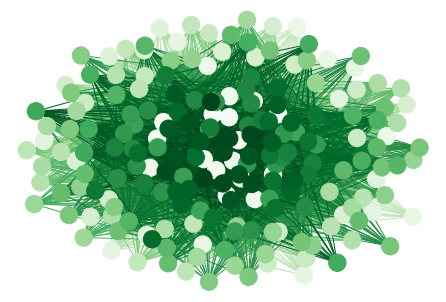

Number of node i in Node groups α :  1025 2863 277 0
Number of node j in Node groups β :  1 629 2631 904
Prob in/bet gr. (P_ab)=
 [[0.01107581 0.02948141 0.00414275 0.        ]
 [0.02948141 0.43087798 0.09394043 0.        ]
 [0.00414275 0.09394043 0.24138482 0.        ]
 [0.         0.         0.         0.        ]] 

##### Random Background ###### 

homophily parameter h=0.001 
heterophily parameter ε=0.333
Random partition graph 
 #N= 202 #E= 4777 #non-E= 15524 #Node_gr= 4


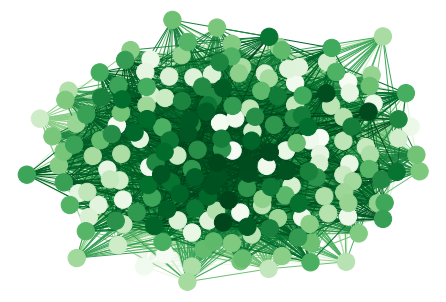

Number of node i in Node groups α :  2837 1659 281 0
Number of node j in Node groups β :  4 1529 2207 1037
Prob in/bet gr. (P_ab)=
 [[0.03515619 0.0229469  0.00748732 0.        ]
 [0.0229469  0.35895169 0.15244033 0.        ]
 [0.00748732 0.15244033 0.1952287  0.        ]
 [0.         0.         0.         0.        ]] 

##### Random Country ###### 

homophily parameter h=0.001 
heterophily parameter ε=0.333
Random partition graph 
 #N= 202 #E= 4733 #non-E= 15568 #Node_gr= 4


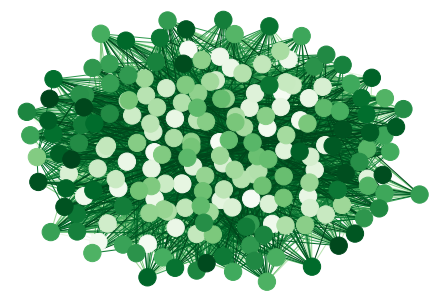

Number of node i in Node groups α :  2696 1490 543 4
Number of node j in Node groups β :  2 782 554 3395
Prob in/bet gr. (P_ab)=
 [[1.63847602e-02 1.08812509e-02 5.96014688e-03 1.40995437e-04]
 [1.08812509e-02 2.45432443e-01 1.50583477e-01 4.15205193e-03]
 [5.96014688e-03 1.50583477e-01 1.27220027e-01 3.41646949e-03]
 [1.40995437e-04 4.15205193e-03 3.41646949e-03 1.48271750e-02]] 

##### Random Language ###### 

homophily parameter h=0.001 
heterophily parameter ε=0.333
Random partition graph 
 #N= 202 #E= 4888 #non-E= 15413 #Node_gr= 4


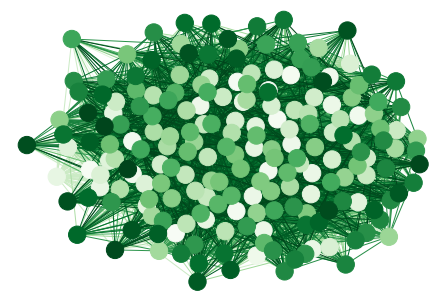

Number of node i in Node groups α :  2471 1538 876 3
Number of node j in Node groups β :  1 732 1087 3068
Prob in/bet gr. (P_ab)=
 [[3.44721521e-03 2.53835644e-03 1.79337342e-03 2.74435467e-05]
 [2.53835644e-03 2.40416106e-01 1.82639715e-01 3.40176008e-03]
 [1.79337342e-03 1.82639715e-01 2.18998353e-01 4.26515170e-03]
 [2.74435467e-05 3.40176008e-03 4.26515170e-03 1.02584363e-02]] 



In [40]:
"1) Random Age Hetero"
P_ab_A_het = main_rand_network_prob('Age' , n_Age,  h_het, ε_het)
"2) Random Seniority Hetero"
P_ab_S_het = main_rand_network_prob('Seniority',n_Senior,  h_het, ε_het)
"3) Random Background Hetero"
P_ab_B_het = main_rand_network_prob('Background',n_Backgr, h_het, ε_het)
"4) Random Country Hetero"
P_ab_C_het = main_rand_network_prob('Country' ,n_Country,  h_het, ε_het)
"5) Random Language Hetero"
P_ab_L_het = main_rand_network_prob('Language',n_Language, h_het, ε_het)

__Plot:  Stochastic Block Model (SBM) Network__

In [41]:
def SBM_plot(attri_name, n_gr, Prob_mean_gr, ind_node_gr, h, ε):
    """ Generate Network (per attribute) of Stochastic Block Model (SBM)
            G             = SBM network model 
            attri_name    = name of attribute   
            n_gr          = node groups  (per one attribute)
            Prob_mean_gr  = Probability Matrix (P_ab) in/between groups 
            ind_node_gr   = index of nodes (after clustering) inside node groups (per one attribute)
            h, ε          = homophily & heterophily parameter
            
            return G
    """
    # The attribute name of given node group
    print('##### SBM %s'%attri_name,'#####\n')
          
    # Homophily Matrix (h_ab)
    h_ab = HA(h, ε)
    
    # Generate Network of SBM
    G = nx.stochastic_block_model(n_gr, Prob_mean_gr, nodelist = ind_node_gr)
    
    # Partition the node group in SBM
    gr_partition = G.graph["partition"]
    
    # Plot SBM network
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=False, 
        node_color=range(G.number_of_nodes()), cmap=plt.cm.Blues, 
        edge_color=range(G.number_of_edges()), edge_cmap=plt.cm.Blues )
    
    print('N=',G.number_of_nodes(),'#E=',G.number_of_edges(),'#non-E=',len(list(nx.non_edges(G))),'#Node_gr=',len(gr_partition) )
    plt.show()
    
    return G

__1) SBM Network : Homophily-dominated__

- __h = 0.95, ε = 0.01__

##### SBM Age #####

homophily parameter h=0.950 
heterophily parameter ε=0.010
N= 202 #E= 8054 #non-E= 12247 #Node_gr= 4


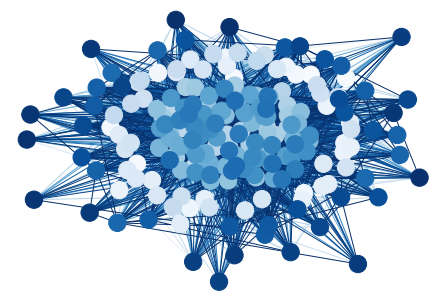

##### SBM Seniority #####

homophily parameter h=0.950 
heterophily parameter ε=0.010
N= 202 #E= 9260 #non-E= 11041 #Node_gr= 4


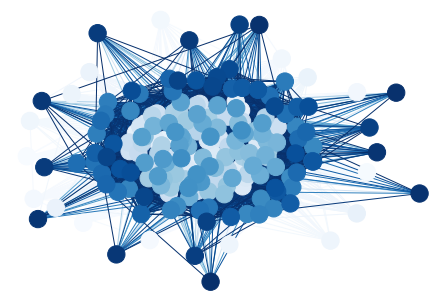

##### SBM Background #####

homophily parameter h=0.950 
heterophily parameter ε=0.010
N= 202 #E= 6634 #non-E= 13667 #Node_gr= 4


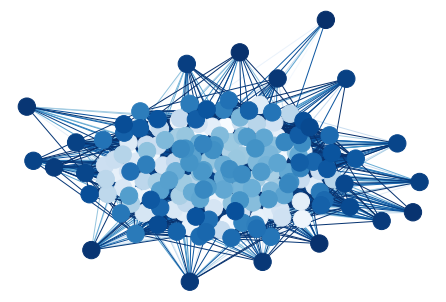

##### SBM Country #####

homophily parameter h=0.950 
heterophily parameter ε=0.010
N= 202 #E= 6449 #non-E= 13852 #Node_gr= 4


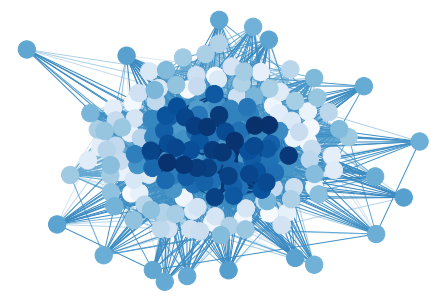

##### SBM Language #####

homophily parameter h=0.950 
heterophily parameter ε=0.010
N= 202 #E= 5788 #non-E= 14513 #Node_gr= 4


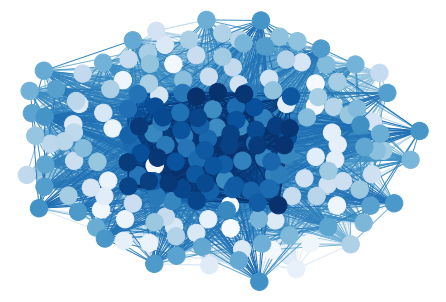

In [42]:
"""1) SBM Age Homo """     
G_A_homo = SBM_plot('Age'       ,n_Age,    P_ab_A_homo, ind_A0_to_A3, h_homo, ε_homo)
"""2) SBM Seniority Homo """
G_S_homo = SBM_plot('Seniority' ,n_Senior, P_ab_S_homo, ind_S1_to_S6, h_homo, ε_homo)
"""3) SBM Background Homo"""
G_B_homo = SBM_plot('Background',n_Backgr, P_ab_B_homo, ind_B1_to_B45, h_homo, ε_homo)
""" 4) SBM Country Homo """
G_C_homo  = SBM_plot('Country'  ,n_Country, P_ab_C_homo, ind_C1_to_C45, h_homo, ε_homo)
""" 5) SBM Language Homo """
G_L_homo  = SBM_plot('Language' ,n_Language, P_ab_L_homo, ind_L1_to_L56, h_homo, ε_homo)

__2) SBM Network : Homogeneous-Mixing__

- __h = 0.25, ε = 0.25__

##### SBM Age #####

homophily parameter h=0.250 
heterophily parameter ε=0.250
N= 202 #E= 4881 #non-E= 15420 #Node_gr= 4


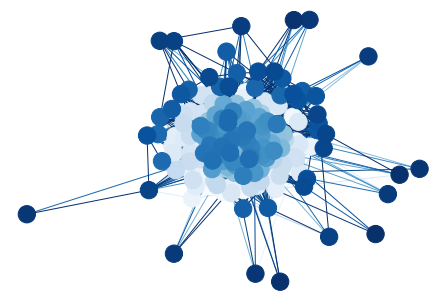

##### SBM Seniority #####

homophily parameter h=0.250 
heterophily parameter ε=0.250
N= 202 #E= 6222 #non-E= 14079 #Node_gr= 4


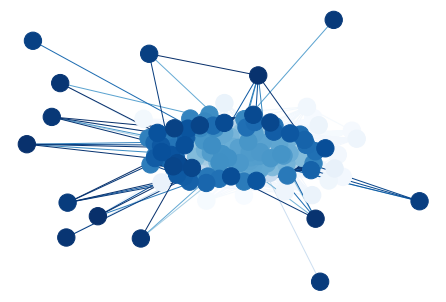

##### SBM Background #####

homophily parameter h=0.250 
heterophily parameter ε=0.250
N= 202 #E= 3982 #non-E= 16319 #Node_gr= 4


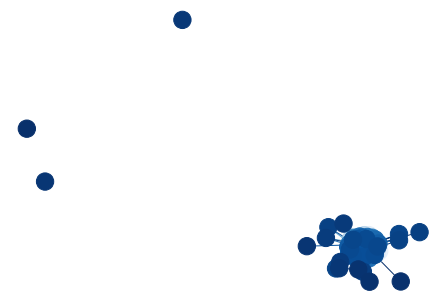

##### SBM Country #####

homophily parameter h=0.250 
heterophily parameter ε=0.250
N= 202 #E= 4291 #non-E= 16010 #Node_gr= 4


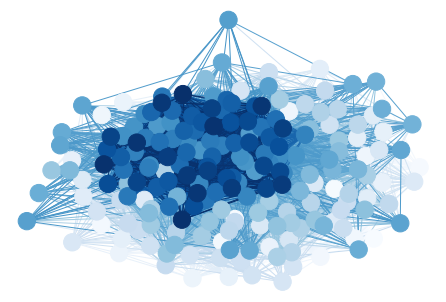

##### SBM Language #####

homophily parameter h=0.250 
heterophily parameter ε=0.250
N= 202 #E= 3632 #non-E= 16669 #Node_gr= 4


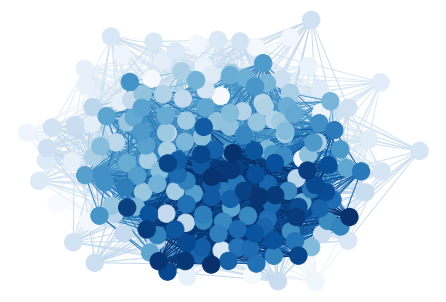

In [43]:
"""1) SBM Age Mix """     
G_A_mix = SBM_plot('Age'       ,n_Age,    P_ab_A_mix, ind_A0_to_A3, h_mix, ε_mix)
"""2) SBM Seniority Mix """
G_S_mix = SBM_plot('Seniority' ,n_Senior, P_ab_S_mix, ind_S1_to_S6, h_mix, ε_mix)
"""3) SBM Background Mix"""
G_B_mix = SBM_plot('Background',n_Backgr, P_ab_B_mix, ind_B1_to_B45, h_mix, ε_mix)
""" 4) SBM Country Mix """
G_C_mix  = SBM_plot('Country'  ,n_Country, P_ab_C_mix, ind_C1_to_C45, h_mix, ε_mix)
""" 5) SBM Language Mix """
G_L_mix  = SBM_plot('Language' ,n_Language, P_ab_L_mix, ind_L1_to_L56, h_mix, ε_mix)

__3) SBM Network : Heterophily-dominated__

- __h = 0.001, ε = 0.333__

##### SBM Age #####

homophily parameter h=0.001 
heterophily parameter ε=0.333
N= 202 #E= 2844 #non-E= 17457 #Node_gr= 4


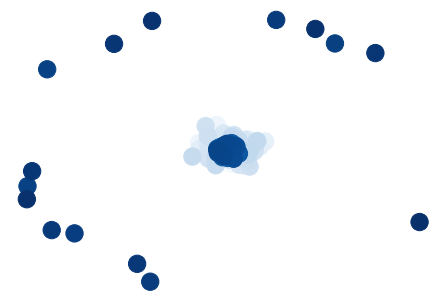

##### SBM Seniority #####

homophily parameter h=0.001 
heterophily parameter ε=0.333
N= 202 #E= 3817 #non-E= 16484 #Node_gr= 4


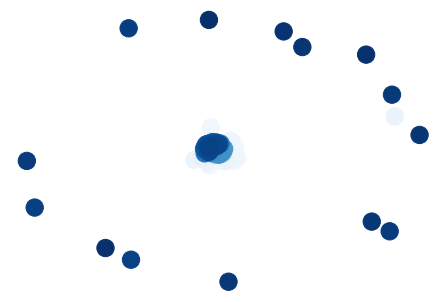

##### SBM Background #####

homophily parameter h=0.001 
heterophily parameter ε=0.333
N= 202 #E= 1960 #non-E= 18341 #Node_gr= 4


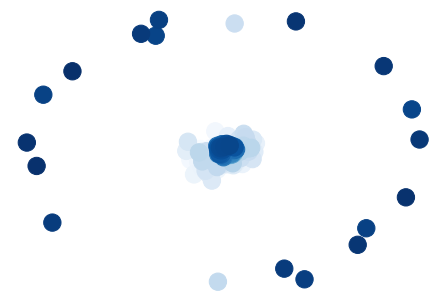

##### SBM Country #####

homophily parameter h=0.001 
heterophily parameter ε=0.333
N= 202 #E= 510 #non-E= 19791 #Node_gr= 4


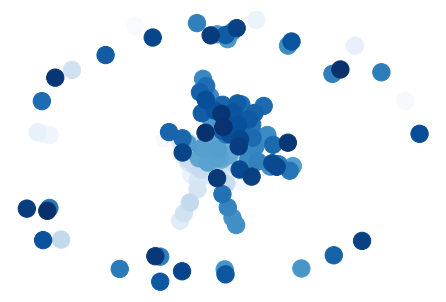

##### SBM Language #####

homophily parameter h=0.001 
heterophily parameter ε=0.333
N= 202 #E= 693 #non-E= 19608 #Node_gr= 4


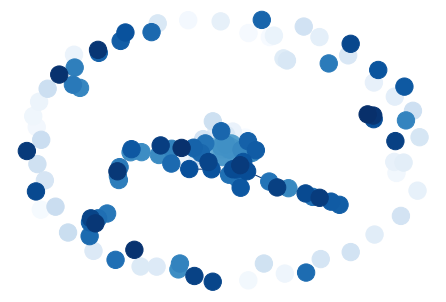

In [44]:
"""1) SBM Age Hetero """     
G_A_het = SBM_plot('Age'       ,n_Age,    P_ab_A_het, ind_A0_to_A3, h_het, ε_het)
"""2) SBM Seniority Hetero """
G_S_het = SBM_plot('Seniority' ,n_Senior, P_ab_S_het, ind_S1_to_S6, h_het, ε_het)
"""3) SBM Background Hetero"""
G_B_het = SBM_plot('Background',n_Backgr, P_ab_B_het, ind_B1_to_B45, h_het, ε_het)
""" 4) SBM Country Hetero """
G_C_het  = SBM_plot('Country'  ,n_Country, P_ab_C_het, ind_C1_to_C45, h_het, ε_het)
""" 5) SBM Language Hetero """
G_L_het  = SBM_plot('Language' ,n_Language, P_ab_L_het, ind_L1_to_L56, h_het, ε_het)

Modify the data for computing 4x4 contact matrix. Some attribute data is merged as node groups are assigned in _four node clusters_ for each attribute in the SBM. 

In [45]:
df_mode_imp_4x4 = df_mode_imp.copy()

In [46]:
### Seniority ###   [n_S1, n_S23, n_S45, n_S6] 
df_mode_imp_4x4['Seniority'][df_mode_imp_4x4['Seniority']=='1'] = '1' ## 1: Bac/Master student
df_mode_imp_4x4['Seniority'][df_mode_imp_4x4['Seniority']=='2'] = '2' ## 2: PhD student
df_mode_imp_4x4['Seniority'][df_mode_imp_4x4['Seniority']=='3'] = '2' ## 3: Postdoctoral researcher
df_mode_imp_4x4['Seniority'][df_mode_imp_4x4['Seniority']=='4'] = '3' ## 4: Junior/Assistant professor
df_mode_imp_4x4['Seniority'][df_mode_imp_4x4['Seniority']=='5'] = '3' ## 5: Associate/Full professor
df_mode_imp_4x4['Seniority'][df_mode_imp_4x4['Seniority']=='6'] = '4' ## 6: Other (industry/staff)
 
### Background ###  [n_B1, n_B2, n_B3, n_B45]
df_mode_imp_4x4['Background'][df_mode_imp_4x4['Background'] =='4'] = '4'  ## 4: Med / Commun / Ling
df_mode_imp_4x4['Background'][df_mode_imp_4x4['Background'] =='5'] = '4'  ## 5: other

### Country ###  [n_C1, n_C2, n_C3, n_C45]
df_mode_imp_4x4['Country'][df_mode_imp_4x4['Country'] =='C1'] = '1'
df_mode_imp_4x4['Country'][df_mode_imp_4x4['Country'] =='C2'] = '2'
df_mode_imp_4x4['Country'][df_mode_imp_4x4['Country'] =='C3'] = '3'
df_mode_imp_4x4['Country'][df_mode_imp_4x4['Country'] =='C4'] = '4' 
df_mode_imp_4x4['Country'][df_mode_imp_4x4['Country'] =='C_oth'] = '4' 

### Language ### [n_L1, n_L2, n_L34, n_L56]
df_mode_imp_4x4['Language'][df_mode_imp_4x4['Language'] =='L1'] = '1' 
df_mode_imp_4x4['Language'][df_mode_imp_4x4['Language'] =='L2'] = '2'   
df_mode_imp_4x4['Language'][df_mode_imp_4x4['Language'] =='L3'] = '3'   
df_mode_imp_4x4['Language'][df_mode_imp_4x4['Language'] =='L4'] = '3'   
df_mode_imp_4x4['Language'][df_mode_imp_4x4['Language'] =='L5'] = '4'   
df_mode_imp_4x4['Language'][df_mode_imp_4x4['Language'] =='L_oth'] = '4'   


df_mode_imp_4x4[0:3]

ID Age Gender Country Language Seniority Background Role Past Participation
0   0   2      M       1        1         2          1    4                 No
1   1   1      F       3        4         3          1    1                Yes
2   2   1      M       4        2         2          1    2                 No

### Contact Matrix

In [47]:
"""CONTACT MATRIX """
def contact_matrix(G,d):
    #List of groups
    l = list(set(d.values()))
    l.sort()
    n = len(l)

    #Number of nodes per group
    N_node_gr = {c: list(d.values()).count(c) for c in l}
    
    #Definition of the contact matrix
    m = np.zeros((n,n))

    #Filling the CM
    for a,b in G.edges():
        c1,c2 = d[a],d[b]
        i,j = l.index(c1),l.index(c2)
        m[i][j] += 1
        m[j][i] += 1

    #Normalisation
    for i in range(n):
        m[i][i] /= 2
        for j in range(n):
            if j == i:   ## z = Num of Possible Links between gr.
                z = N_node_gr[l[i]]*(N_node_gr[l[i]]-1)/2
            else:
                z = N_node_gr[l[i]]*N_node_gr[l[j]]
            m[i][j] /= z

    return m

__Contact Matrix : Homophily__

__Inverse contact matrix : Heterophily__


We compute the contact matrix of network in SBM given the attribute data, and we assign the inverse contact matrix as the difference of unity and contact matrix. 

In [48]:
df_mode_imp_4x4_np = pd.DataFrame(df_mode_imp_4x4).to_numpy()

dAge, dGender, dCountry, dLanguage, dSenior, dBackgr, dRole, dParti = {}, {}, {}, {}, {}, {}, {}, {}

### Age, Gender, Country, Language, Seniority, Backgr, Role, Past parti. ###
for n,a,g,c,l,s,b,r,p in df_mode_imp_4x4_np:   #### MODE IMPUTATION
    dAge [int(n)]    = a
    dGender[int(n)]  = g
    dLanguage[int(n)]= l
    dCountry[int(n)] = c
    dSenior[int(n)]  = s
    dBackgr[int(n)]  = b
    dRole[int(n)]    = r
    dParti[int(n)]   = p

In [49]:
"""
   1) Homophily-dominated :  h = 0.95, ε = 0.01
"""    
    
""" Contact Matrix         : Homophily   """
mAge_homo     = contact_matrix(G_A_homo,dAge)
mSenior_homo  = contact_matrix(G_S_homo,dSenior)
mBackgr_homo  = contact_matrix(G_B_homo,dBackgr)
mCountry_homo = contact_matrix(G_C_homo,dCountry)
mLanguage_homo= contact_matrix(G_L_homo,dLanguage)


""" Inverse Contact Matrix : Heterophily   """
mAge_homo_inv     = 1- mAge_homo
mSenior_homo_inv  = 1- mSenior_homo
mBackgr_homo_inv  = 1- mBackgr_homo
mCountry_homo_inv = 1- mCountry_homo
mLanguage_homo_inv= 1- mLanguage_homo

In [50]:
"""
   2) Homogenous Mixing :  h = 0.25, ε = 0.25
"""    
        
""" Contact Matrix         : Homophily   """
mAge_mix     = contact_matrix(G_A_mix,dAge)
mSenior_mix  = contact_matrix(G_S_mix,dSenior)
mBackgr_mix  = contact_matrix(G_B_mix,dBackgr)
mCountry_mix = contact_matrix(G_C_mix,dCountry)
mLanguage_mix= contact_matrix(G_L_mix,dLanguage)


""" Inverse Contact Matrix : Heterophily   """
mAge_mix_inv     = 1- mAge_mix 
mSenior_mix_inv  = 1- mSenior_mix 
mBackgr_mix_inv  = 1- mBackgr_mix 
mCountry_mix_inv = 1- mCountry_mix 
mLanguage_mix_inv= 1- mLanguage_mix 

In [51]:
"""
   3) Heterophily-dominated  :  h = 0.001, ε = 0.333
"""    
        
""" Contact Matrix         : Homophily   """
mAge_het     = contact_matrix(G_A_het,dAge)
mSenior_het  = contact_matrix(G_S_het,dSenior)
mBackgr_het  = contact_matrix(G_B_het,dBackgr)
mCountry_het = contact_matrix(G_C_het,dCountry)
mLanguage_het= contact_matrix(G_L_het,dLanguage)


""" Inverse Contact Matrix : Heterophily   """
mAge_het_inv     = 1- mAge_het
mSenior_het_inv  = 1- mSenior_het
mBackgr_het_inv  = 1- mBackgr_het
mCountry_het_inv = 1- mCountry_het
mLanguage_het_inv= 1- mLanguage_het

After this part, we plot all of the contact matrices and inverse contact matrices for each attribute in different case of homophilies in the SBM network.

__1) Contact Matrices: Homophily-dominated__

homophily parameter h=0.950 
heterophily parameter ε=0.010


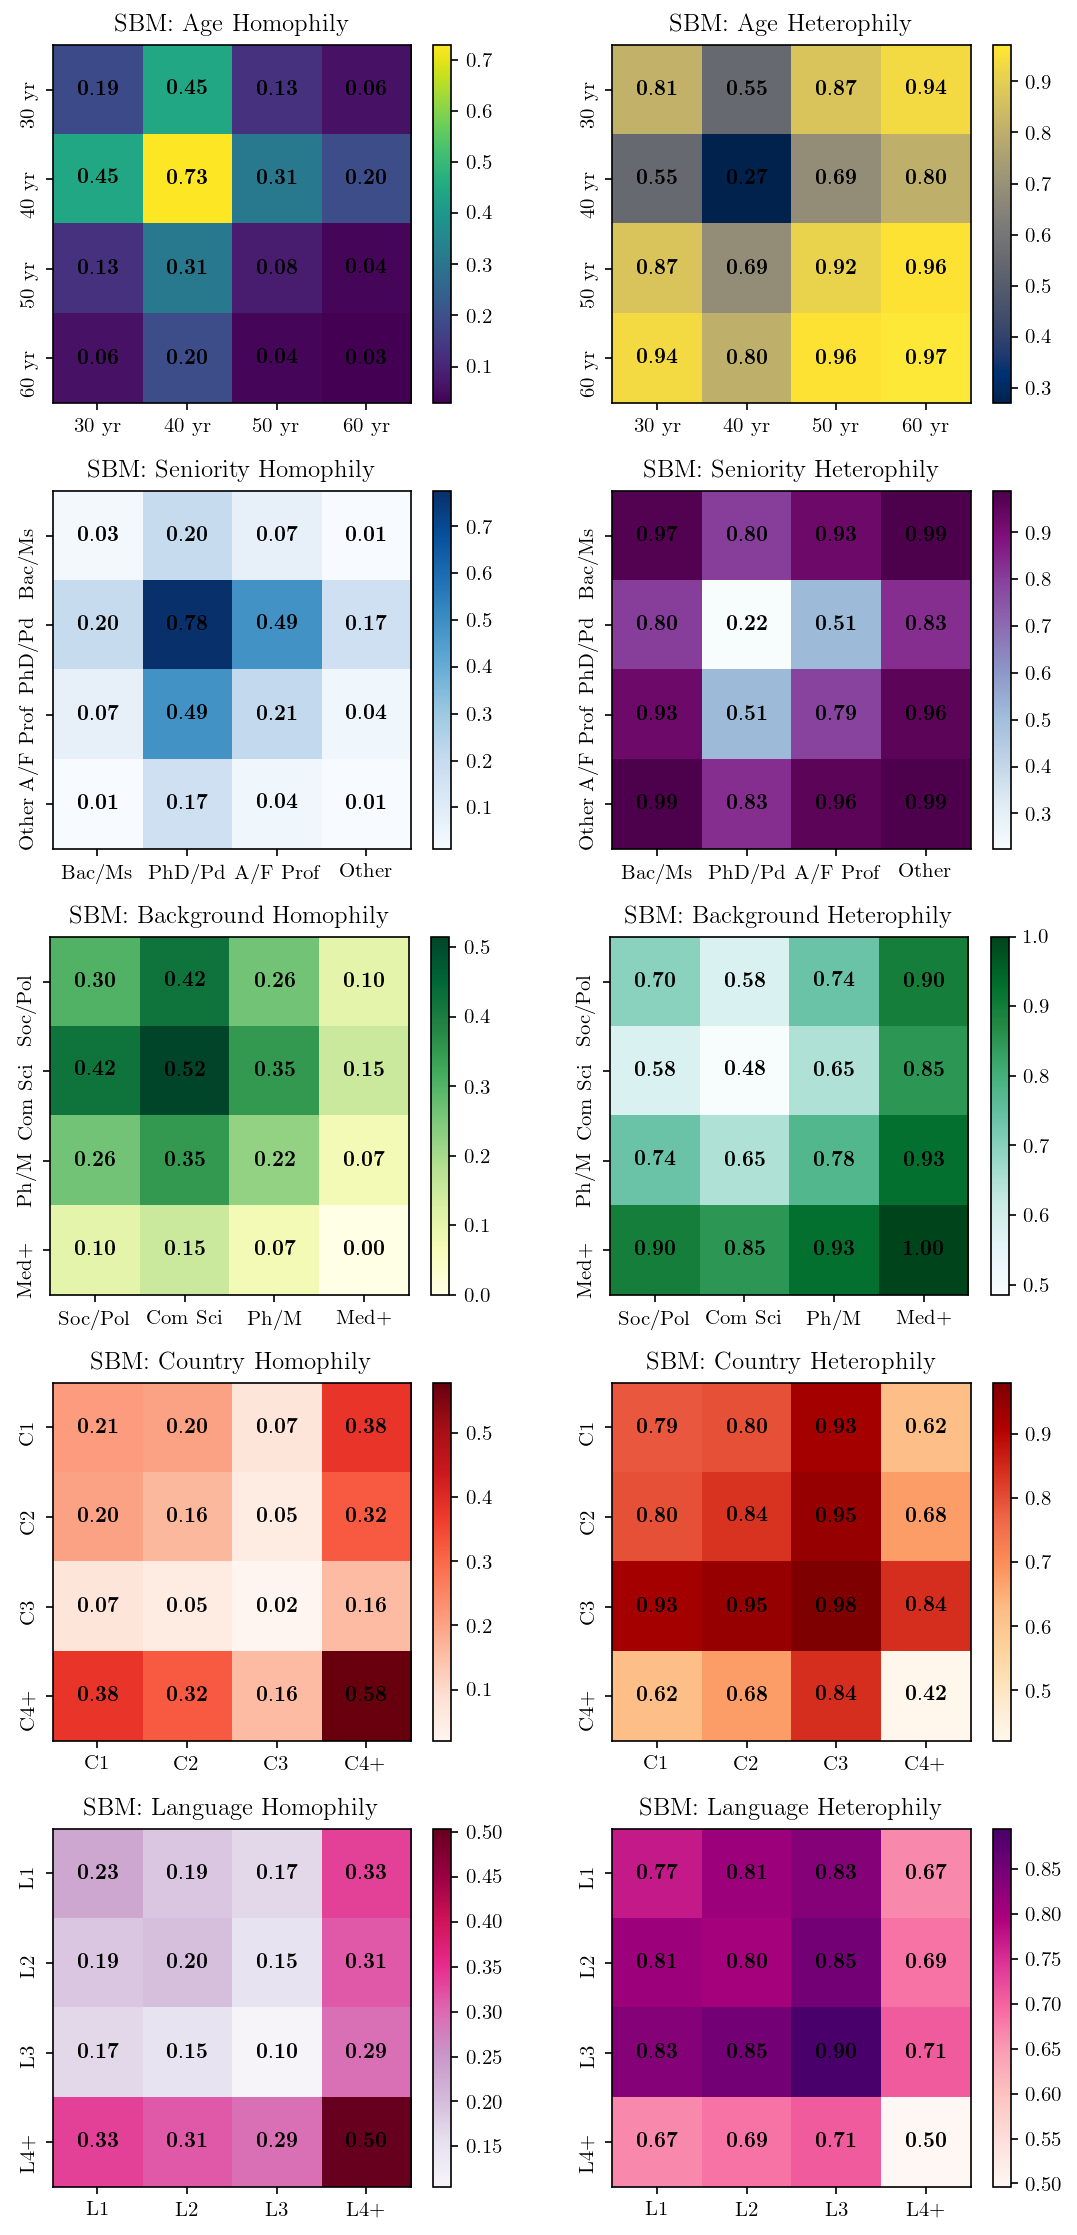

In [52]:
#### LABELING Group ##### 
lAge     = ['30 yr', '40 yr', '50 yr', '60 yr']  
lSenior  = ['Bac/Ms', 'PhD/Pd', 'A/F Prof', 'Other']
lBackgr  = ['Soc/Pol', 'Com Sci', 'Ph/M','Med+']
lCountry = ['C1', 'C2', 'C3', 'C4+']
lLanguage= ['L1', 'L2', 'L3', 'L4+']


#### NUMBER of Labeled Group #####
nA = len(lAge)
nS = len(lSenior)
nB = len(lBackgr)
nC = len(lCountry)
nL = len(lLanguage)


"""
   1) Homophily-dominated :  h = 0.95, ε = 0.01
"""    
    

"""Homophily parameters"""    
h_ab = HA(h, ε)


""" Plot HOMOPHILY  """
fig = plt.figure(figsize=(8,15), tight_layout=True, dpi=150)


""" 1.1) Age HOMOPHILY """
ax11 = plt.subplot(5,2,1)
im11 = ax11.imshow(mAge_homo,cmap='viridis')
ax11.set_xticks(range(nA))
ax11.set_xticklabels(lAge, rotation="horizontal")
ax11.set_yticks(range(nA))
ax11.set_yticklabels(lAge, rotation="vertical")
ax11.set_title(r'SBM: Age Homophily')
for i in range(nA):  # Loop over data dimensions and create text annotations.
    for j in range(nA):
        text = ax11.text(j, i, r'$\mathbf{%.2f}$'%mAge_homo[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im11, fraction=0.046, pad=0.04)


""" 1.2) Seniority HOMOPHILY """
ax12 = plt.subplot(5,2,3)
im12 = ax12.imshow(mSenior_homo,cmap='Blues')
ax12.set_xticks(range(nS))
ax12.set_xticklabels(lSenior, rotation="horizontal")
ax12.set_yticks(range(nS))
ax12.set_yticklabels(lSenior, rotation="vertical")
ax12.set_title(r'SBM: Seniority Homophily')
for i in range(nS):  
    for j in range(nS):
        text = ax12.text(j, i, r'$\mathbf{%.2f}$'%mSenior_homo[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im12, fraction=0.046, pad=0.04)



""" 1.3) Background HOMOPHILY """
ax13 = plt.subplot(5,2,5)
im13 = ax13.imshow(mBackgr_homo,cmap='YlGn')
ax13.set_xticks(range(nB))
ax13.set_xticklabels(lBackgr, rotation="horizontal")
ax13.set_yticks(range(nB))
ax13.set_yticklabels(lBackgr, rotation="vertical")
ax13.set_title(r'SBM: Background Homophily')
for i in range(nB):  
    for j in range(nB):
        text = ax13.text(j, i, r'$\mathbf{%.2f}$'%mBackgr_homo[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im13, fraction=0.05, pad=0.04)



""" 1.4) Country HOMOPHILY """
ax14 = plt.subplot(5,2,7)
im14 = ax14.imshow(mCountry_homo,cmap='Reds')
ax14.set_xticks(range(nS))
ax14.set_xticklabels(lCountry, rotation="horizontal")
ax14.set_yticks(range(nS))
ax14.set_yticklabels(lCountry, rotation="vertical")
ax14.set_title(r'SBM: Country Homophily')
for i in range(nC):  
    for j in range(nC):
        text = ax14.text(j, i, r'$\mathbf{%.2f}$'%mCountry_homo[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im14, fraction=0.046, pad=0.04)




""" 1.5) Language HOMOPHILY """
ax15 = plt.subplot(5,2,9)
im15 = ax15.imshow(mLanguage_homo,cmap='PuRd')
ax15.set_xticks(range(nL))
ax15.set_xticklabels(lLanguage, rotation="horizontal")
ax15.set_yticks(range(nL))
ax15.set_yticklabels(lLanguage, rotation="vertical")
ax15.set_title(r'SBM: Language Homophily')
for i in range(nL):  
    for j in range(nL):
        text = ax15.text(j, i, r'$\mathbf{%.2f}$'%mLanguage_homo[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im15, fraction=0.046, pad=0.04)




""" Plot HETEROPHILY """

""" 2.1) Age HETEROPHILY """
ax21 = plt.subplot(5,2,2)
im21 = ax21.imshow(mAge_homo_inv,cmap='cividis')
ax21.set_xticks(range(nA))
ax21.set_xticklabels(lAge, rotation="horizontal")
ax21.set_yticks(range(nA))
ax21.set_yticklabels(lAge, rotation="vertical")
ax21.set_title(r'SBM: Age Heterophily')
for i in range(nA): # Loop over data dimensions and create text annotations.
    for j in range(nA):
        text = ax21.text(j, i, r'$\mathbf{%.2f}$'%mAge_homo_inv[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im21, fraction=0.046, pad=0.04)


""" 2.2) Seniority HETEROPHILY """
ax22 = plt.subplot(5,2,4)
im22 = ax22.imshow(mSenior_homo_inv,cmap='BuPu')
ax22.set_xticks(range(nS))
ax22.set_xticklabels(lSenior, rotation="horizontal")
ax22.set_yticks(range(nS))
ax22.set_yticklabels(lSenior, rotation="vertical")
ax22.set_title(r'SBM: Seniority Heterophily')
for i in range(nA): # Loop over data dimensions and create text annotations.
    for j in range(nA):
        text = ax22.text(j, i, r'$\mathbf{%.2f}$'%mSenior_homo_inv[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im22, fraction=0.046, pad=0.04)



""" 2.3) Background HETEROPHILY """
ax23 = plt.subplot(5,2,6)
im23 = ax23.imshow(mBackgr_homo_inv,cmap='BuGn')
ax23.set_xticks(range(nB))
ax23.set_xticklabels(lBackgr, rotation="horizontal")
ax23.set_yticks(range(nB))
ax23.set_yticklabels(lBackgr, rotation="vertical")
ax23.set_title(r'SBM: Background Heterophily')
for i in range(nB):  
    for j in range(nB):
        text = ax23.text(j, i, r'$\mathbf{%.2f}$'%mBackgr_homo_inv[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im23, fraction=0.05, pad=0.04)




""" 2.4) Country HETEROPHILY """
ax24 = plt.subplot(5,2,8)
im24 = ax24.imshow(mCountry_homo_inv,cmap='OrRd')
ax24.set_xticks(range(nC))
ax24.set_xticklabels(lCountry, rotation="horizontal")
ax24.set_yticks(range(nC))
ax24.set_yticklabels(lCountry, rotation="vertical")
ax24.set_title(r'SBM: Country Heterophily')
for i in range(nC):  
    for j in range(nC):
        text = ax24.text(j, i, r'$\mathbf{%.2f}$'%mCountry_homo_inv[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im24, fraction=0.046, pad=0.04)



""" 2.5) Language HETEROPHILY """
ax25 = plt.subplot(5,2,10)
im25 = ax25.imshow(mLanguage_homo_inv,cmap='RdPu')
ax25.set_xticks(range(nL))
ax25.set_xticklabels(lLanguage, rotation="horizontal")
ax25.set_yticks(range(nL))
ax25.set_yticklabels(lLanguage, rotation="vertical")
ax25.set_title(r'SBM: Language Heterophily')
for i in range(nL):  
    for j in range(nL):
        text = ax25.text(j, i, r'$\mathbf{%.2f}$'%mLanguage_homo_inv[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im25, fraction=0.046, pad=0.04)


# plt.savefig('CM_SBM_homo_ALL.pdf')
plt.show()

__2) Contact Matrices: Homogenous Mixing__

homophily parameter h=0.250 
heterophily parameter ε=0.250


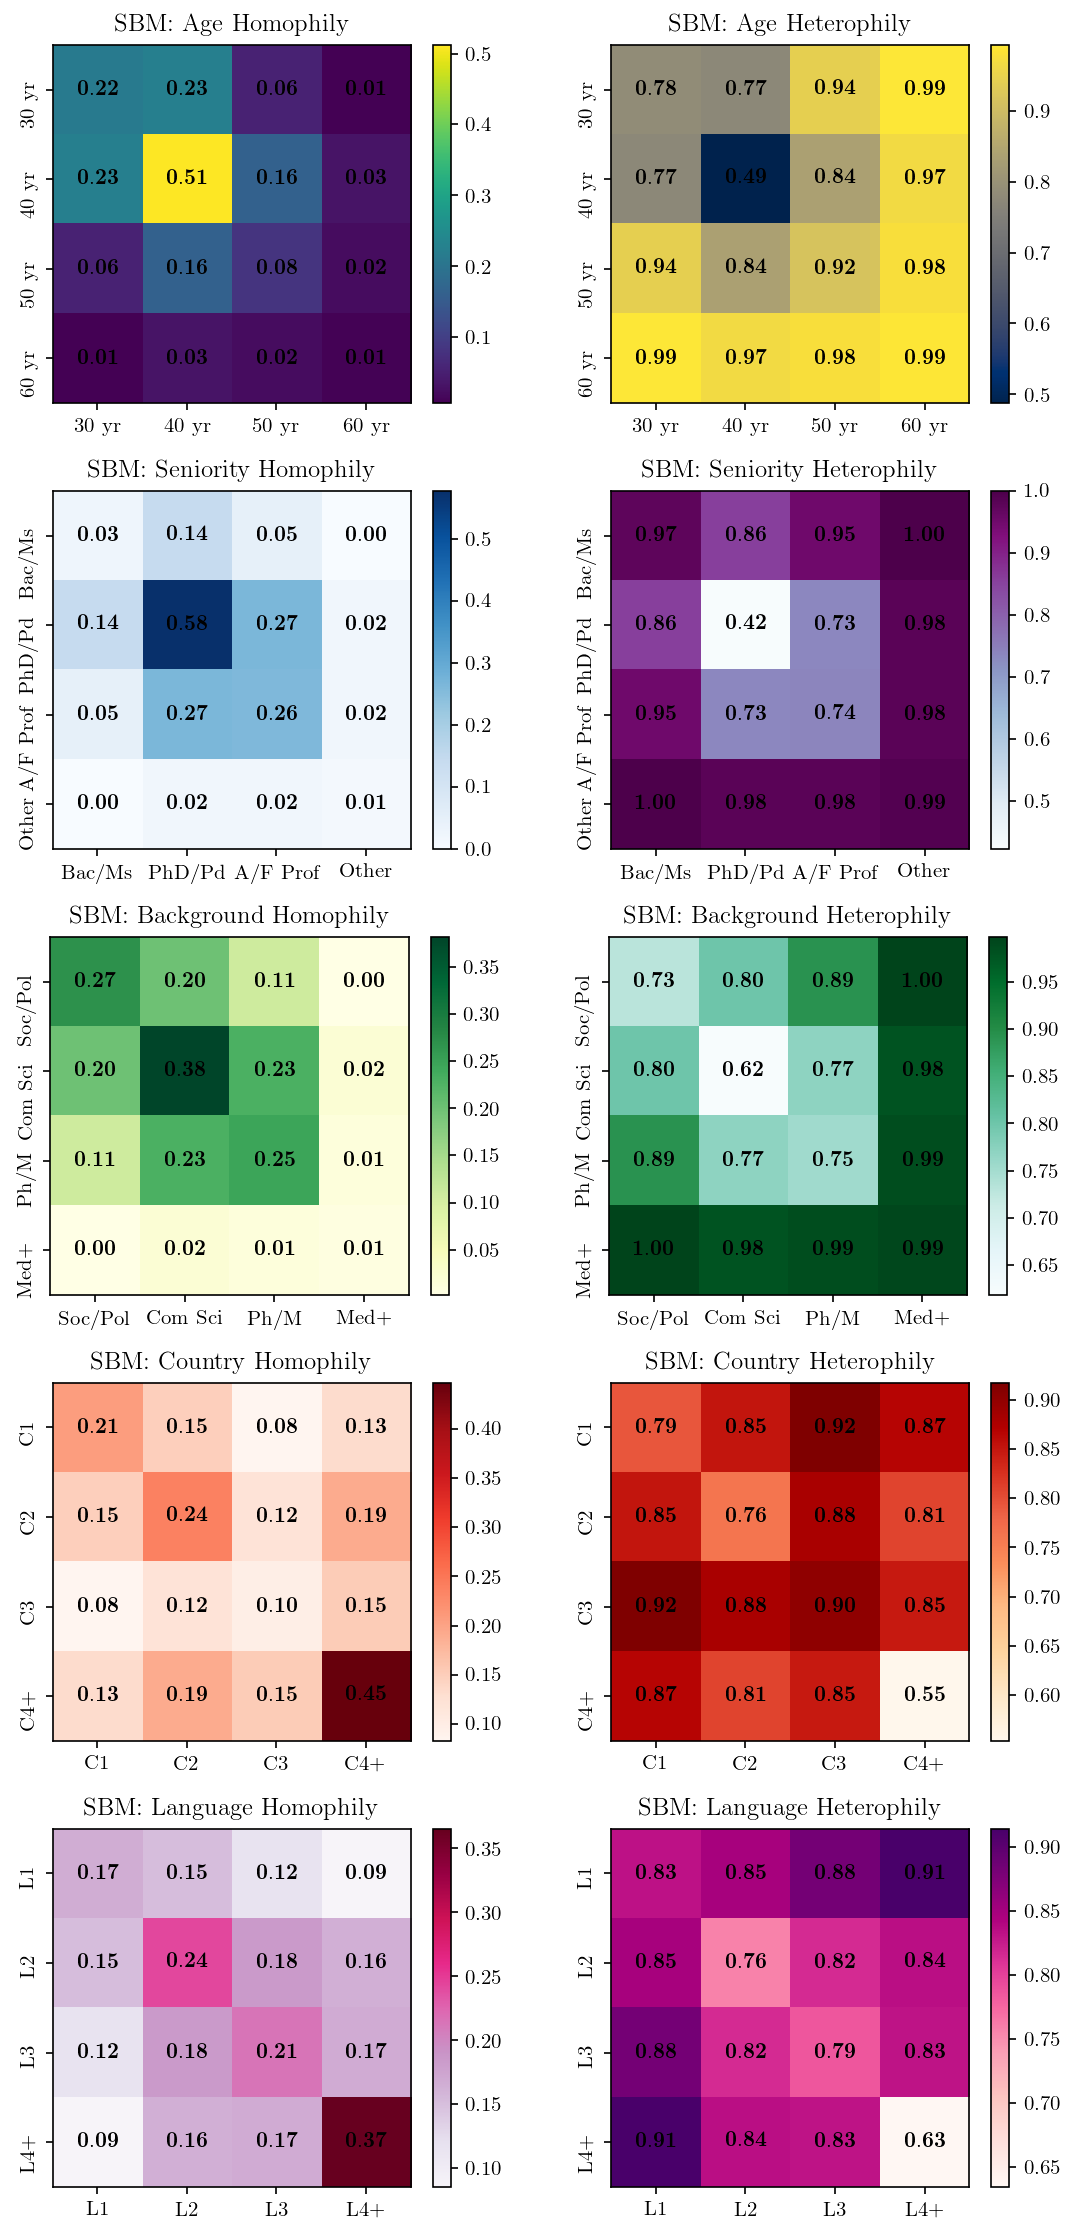

In [53]:
"""
   2) Homogenous Mixing :  h = 0.25, ε = 0.25
"""    
    
"""Homophily parameters"""    
h_ab = HA(h=h_mix, ε=ε_mix)


""" Plot HOMOPHILY  """
fig = plt.figure(figsize=(8,15), tight_layout=True, dpi=150)


""" 1.1) Age HOMOPHILY """
ax11 = plt.subplot(5,2,1)
im11 = ax11.imshow(mAge_mix,cmap='viridis')
ax11.set_xticks(range(nA))
ax11.set_xticklabels(lAge, rotation="horizontal")
ax11.set_yticks(range(nA))
ax11.set_yticklabels(lAge, rotation="vertical")
ax11.set_title(r'SBM: Age Homophily')
for i in range(nA):  # Loop over data dimensions and create text annotations.
    for j in range(nA):
        text = ax11.text(j, i, r'$\mathbf{%.2f}$'%mAge_mix[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im11, fraction=0.046, pad=0.04)


""" 1.2) Seniority HOMOPHILY """
ax12 = plt.subplot(5,2,3)
im12 = ax12.imshow(mSenior_mix,cmap='Blues')
ax12.set_xticks(range(nS))
ax12.set_xticklabels(lSenior, rotation="horizontal")
ax12.set_yticks(range(nS))
ax12.set_yticklabels(lSenior, rotation="vertical")
ax12.set_title(r'SBM: Seniority Homophily')
for i in range(nS):  
    for j in range(nS):
        text = ax12.text(j, i, r'$\mathbf{%.2f}$'%mSenior_mix[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im12, fraction=0.046, pad=0.04)



""" 1.3) Background HOMOPHILY """
ax13 = plt.subplot(5,2,5)
im13 = ax13.imshow(mBackgr_mix,cmap='YlGn')
ax13.set_xticks(range(nB))
ax13.set_xticklabels(lBackgr, rotation="horizontal")
ax13.set_yticks(range(nB))
ax13.set_yticklabels(lBackgr, rotation="vertical")
ax13.set_title(r'SBM: Background Homophily')
for i in range(nB):  
    for j in range(nB):
        text = ax13.text(j, i, r'$\mathbf{%.2f}$'%mBackgr_mix[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im13, fraction=0.05, pad=0.04)



""" 1.4) Country HOMOPHILY """
ax14 = plt.subplot(5,2,7)
im14 = ax14.imshow(mCountry_mix,cmap='Reds')
ax14.set_xticks(range(nS))
ax14.set_xticklabels(lCountry, rotation="horizontal")
ax14.set_yticks(range(nS))
ax14.set_yticklabels(lCountry, rotation="vertical")
ax14.set_title(r'SBM: Country Homophily')
for i in range(nC):  
    for j in range(nC):
        text = ax14.text(j, i, r'$\mathbf{%.2f}$'%mCountry_mix[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im14, fraction=0.046, pad=0.04)



""" 1.5) Language HOMOPHILY """
ax15 = plt.subplot(5,2,9)
im15 = ax15.imshow(mLanguage_mix,cmap='PuRd')
ax15.set_xticks(range(nL))
ax15.set_xticklabels(lLanguage, rotation="horizontal")
ax15.set_yticks(range(nL))
ax15.set_yticklabels(lLanguage, rotation="vertical")
ax15.set_title(r'SBM: Language Homophily')
for i in range(nL):  
    for j in range(nL):
        text = ax15.text(j, i, r'$\mathbf{%.2f}$'%mLanguage_mix[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im15, fraction=0.046, pad=0.04)




""" Plot HETEROPHILY """

""" 2.1) Age HETEROPHILY """
ax21 = plt.subplot(5,2,2)
im21 = ax21.imshow(mAge_mix_inv,cmap='cividis')
ax21.set_xticks(range(nA))
ax21.set_xticklabels(lAge, rotation="horizontal")
ax21.set_yticks(range(nA))
ax21.set_yticklabels(lAge, rotation="vertical")
ax21.set_title(r'SBM: Age Heterophily')
for i in range(nA): # Loop over data dimensions and create text annotations.
    for j in range(nA):
        text = ax21.text(j, i, r'$\mathbf{%.2f}$'%mAge_mix_inv[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im21, fraction=0.046, pad=0.04)


""" 2.2) Seniority HETEROPHILY """
ax22 = plt.subplot(5,2,4)
im22 = ax22.imshow(mSenior_mix_inv,cmap='BuPu')
ax22.set_xticks(range(nS))
ax22.set_xticklabels(lSenior, rotation="horizontal")
ax22.set_yticks(range(nS))
ax22.set_yticklabels(lSenior, rotation="vertical")
ax22.set_title(r'SBM: Seniority Heterophily')
for i in range(nA): # Loop over data dimensions and create text annotations.
    for j in range(nA):
        text = ax22.text(j, i, r'$\mathbf{%.2f}$'%mSenior_mix_inv[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im22, fraction=0.046, pad=0.04)



""" 2.3) Background HETEROPHILY """
ax23 = plt.subplot(5,2,6)
im23 = ax23.imshow(mBackgr_mix_inv,cmap='BuGn')
ax23.set_xticks(range(nB))
ax23.set_xticklabels(lBackgr, rotation="horizontal")
ax23.set_yticks(range(nB))
ax23.set_yticklabels(lBackgr, rotation="vertical")
ax23.set_title(r'SBM: Background Heterophily')
for i in range(nB):  
    for j in range(nB):
        text = ax23.text(j, i, r'$\mathbf{%.2f}$'%mBackgr_mix_inv[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im23, fraction=0.05, pad=0.04)




""" 2.4) Country HETEROPHILY """
ax24 = plt.subplot(5,2,8)
im24 = ax24.imshow(mCountry_mix_inv,cmap='OrRd')
ax24.set_xticks(range(nC))
ax24.set_xticklabels(lCountry, rotation="horizontal")
ax24.set_yticks(range(nC))
ax24.set_yticklabels(lCountry, rotation="vertical")
ax24.set_title(r'SBM: Country Heterophily')
for i in range(nC):  
    for j in range(nC):
        text = ax24.text(j, i, r'$\mathbf{%.2f}$'%mCountry_mix_inv[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im24, fraction=0.046, pad=0.04)



""" 2.5) Language HETEROPHILY """
ax25 = plt.subplot(5,2,10)
im25 = ax25.imshow(mLanguage_mix_inv,cmap='RdPu')
ax25.set_xticks(range(nL))
ax25.set_xticklabels(lLanguage, rotation="horizontal")
ax25.set_yticks(range(nL))
ax25.set_yticklabels(lLanguage, rotation="vertical")
ax25.set_title(r'SBM: Language Heterophily')
for i in range(nL):  
    for j in range(nL):
        text = ax25.text(j, i, r'$\mathbf{%.2f}$'%mLanguage_mix_inv[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im25, fraction=0.046, pad=0.04)


# plt.savefig('CM_SBM_mix_ALL.pdf')
plt.show()

__3) Contact Matrices: Heterophily-dominated__

homophily parameter h=0.001 
heterophily parameter ε=0.333


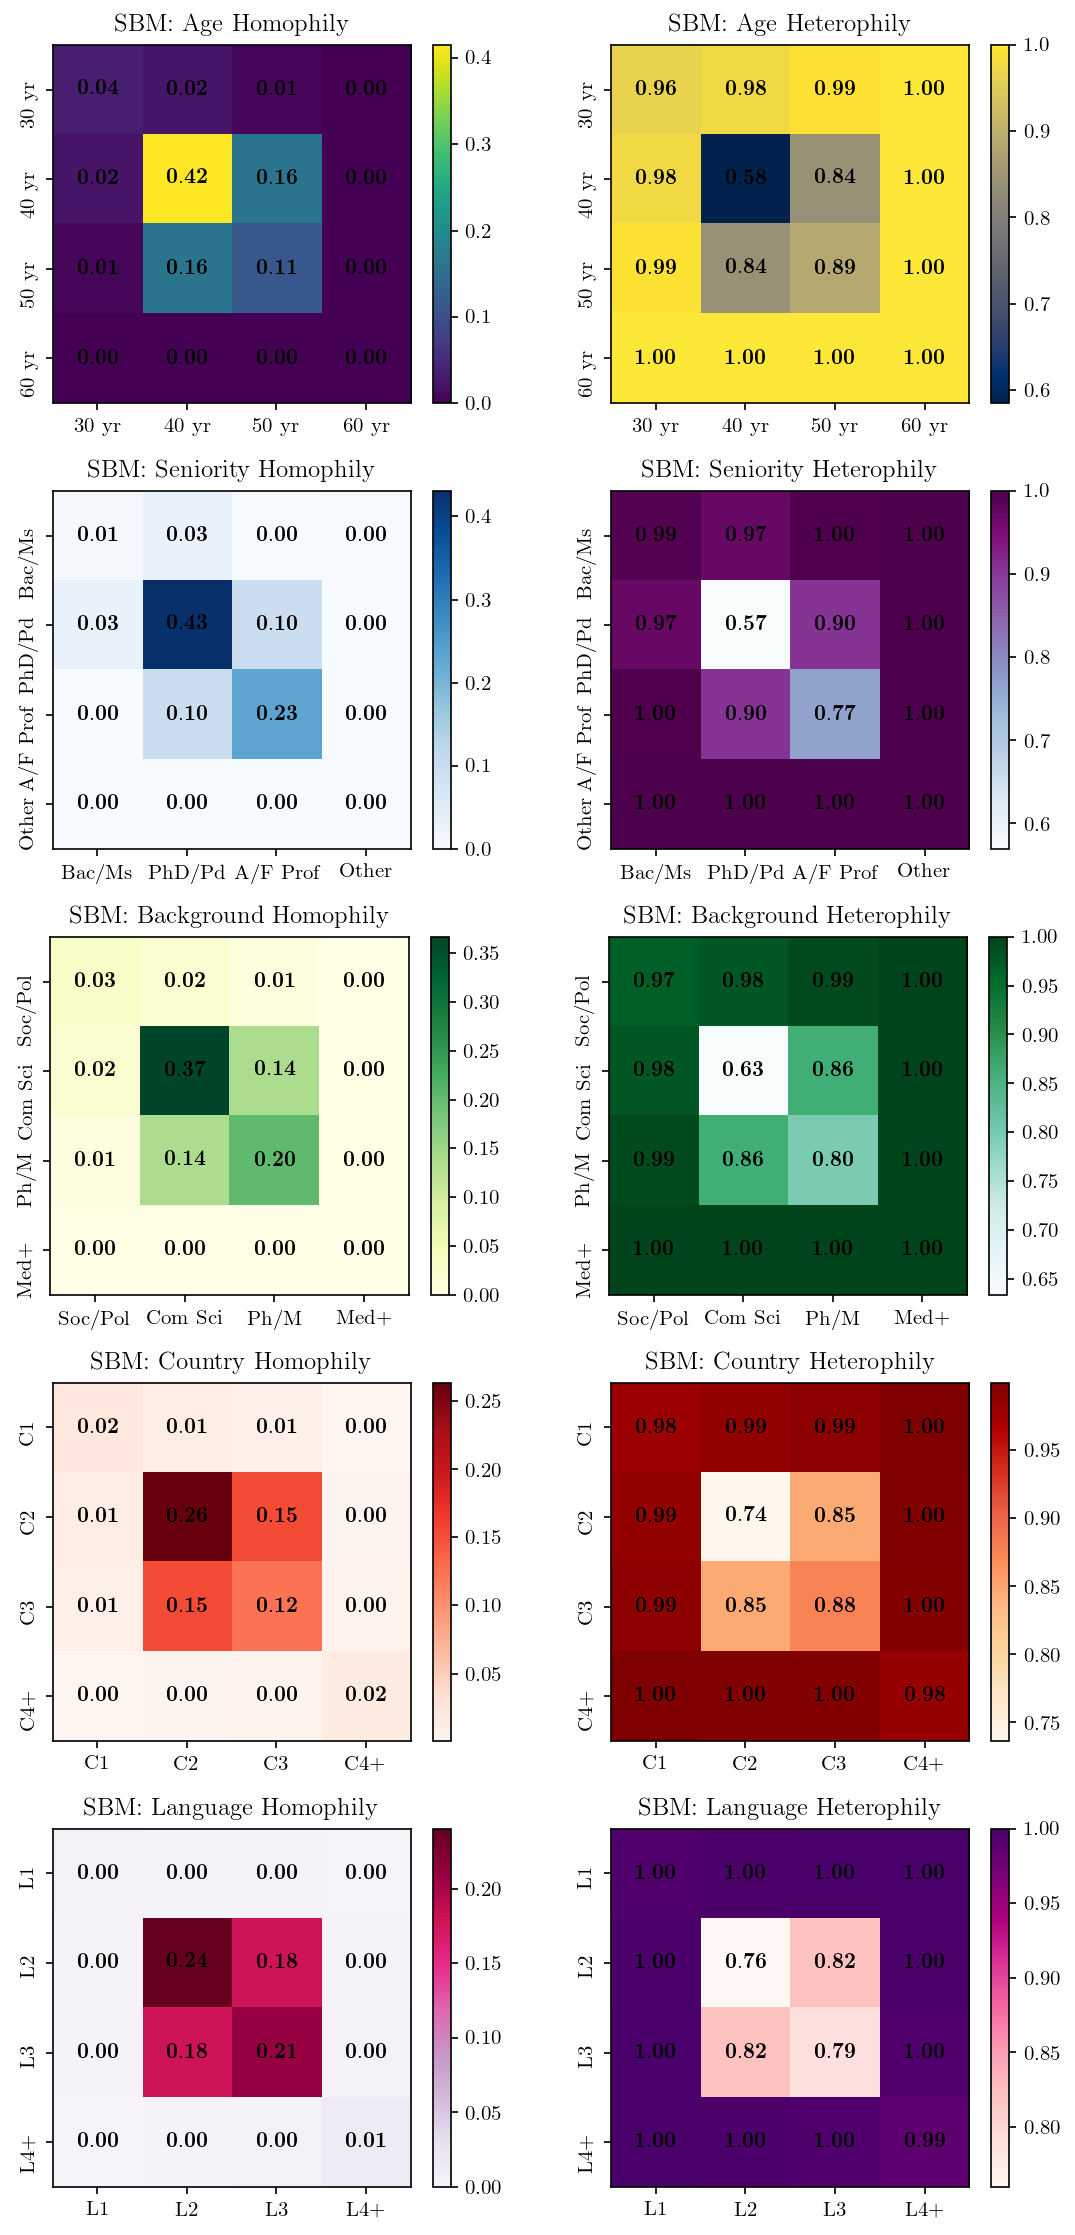

In [54]:
"""
   3) Heterophily-dominated :  h = 0.001, ε = 0.333
"""    
    
"""Homophily parameters"""    
h_ab = HA(h=h_het, ε=ε_het)


""" Plot HOMOPHILY  """
fig = plt.figure(figsize=(8,15), tight_layout=True, dpi=150)


""" 1.1) Age HOMOPHILY """
ax11 = plt.subplot(5,2,1)
im11 = ax11.imshow(mAge_het,cmap='viridis')
ax11.set_xticks(range(nA))
ax11.set_xticklabels(lAge, rotation="horizontal")
ax11.set_yticks(range(nA))
ax11.set_yticklabels(lAge, rotation="vertical")
ax11.set_title(r'SBM: Age Homophily')
for i in range(nA):  # Loop over data dimensions and create text annotations.
    for j in range(nA):
        text = ax11.text(j, i, r'$\mathbf{%.2f}$'%mAge_het[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im11, fraction=0.046, pad=0.04)


""" 1.2) Seniority HOMOPHILY """
ax12 = plt.subplot(5,2,3)
im12 = ax12.imshow(mSenior_het,cmap='Blues')
ax12.set_xticks(range(nS))
ax12.set_xticklabels(lSenior, rotation="horizontal")
ax12.set_yticks(range(nS))
ax12.set_yticklabels(lSenior, rotation="vertical")
ax12.set_title(r'SBM: Seniority Homophily')
for i in range(nS):  
    for j in range(nS):
        text = ax12.text(j, i, r'$\mathbf{%.2f}$'%mSenior_het[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im12, fraction=0.046, pad=0.04)



""" 1.3) Background HOMOPHILY """
ax13 = plt.subplot(5,2,5)
im13 = ax13.imshow(mBackgr_het,cmap='YlGn')
ax13.set_xticks(range(nB))
ax13.set_xticklabels(lBackgr, rotation="horizontal")
ax13.set_yticks(range(nB))
ax13.set_yticklabels(lBackgr, rotation="vertical")
ax13.set_title(r'SBM: Background Homophily')
for i in range(nB):  
    for j in range(nB):
        text = ax13.text(j, i, r'$\mathbf{%.2f}$'%mBackgr_het[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im13, fraction=0.05, pad=0.04)



""" 1.4) Country HOMOPHILY """
ax14 = plt.subplot(5,2,7)
im14 = ax14.imshow(mCountry_het,cmap='Reds')
ax14.set_xticks(range(nS))
ax14.set_xticklabels(lCountry, rotation="horizontal")
ax14.set_yticks(range(nS))
ax14.set_yticklabels(lCountry, rotation="vertical")
ax14.set_title(r'SBM: Country Homophily')
for i in range(nC):  
    for j in range(nC):
        text = ax14.text(j, i, r'$\mathbf{%.2f}$'%mCountry_het[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im14, fraction=0.046, pad=0.04)



""" 1.5) Language HOMOPHILY """
ax15 = plt.subplot(5,2,9)
im15 = ax15.imshow(mLanguage_het,cmap='PuRd')
ax15.set_xticks(range(nL))
ax15.set_xticklabels(lLanguage, rotation="horizontal")
ax15.set_yticks(range(nL))
ax15.set_yticklabels(lLanguage, rotation="vertical")
ax15.set_title(r'SBM: Language Homophily')
for i in range(nL):  
    for j in range(nL):
        text = ax15.text(j, i, r'$\mathbf{%.2f}$'%mLanguage_het[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im15, fraction=0.046, pad=0.04)




""" Plot HETEROPHILY """

""" 2.1) Age HETEROPHILY """
ax21 = plt.subplot(5,2,2)
im21 = ax21.imshow(mAge_het_inv,cmap='cividis')
ax21.set_xticks(range(nA))
ax21.set_xticklabels(lAge, rotation="horizontal")
ax21.set_yticks(range(nA))
ax21.set_yticklabels(lAge, rotation="vertical")
ax21.set_title(r'SBM: Age Heterophily')
for i in range(nA): # Loop over data dimensions and create text annotations.
    for j in range(nA):
        text = ax21.text(j, i, r'$\mathbf{%.2f}$'%mAge_het_inv[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im21, fraction=0.046, pad=0.04)


""" 2.2) Seniority HETEROPHILY """
ax22 = plt.subplot(5,2,4)
im22 = ax22.imshow(mSenior_het_inv,cmap='BuPu')
ax22.set_xticks(range(nS))
ax22.set_xticklabels(lSenior, rotation="horizontal")
ax22.set_yticks(range(nS))
ax22.set_yticklabels(lSenior, rotation="vertical")
ax22.set_title(r'SBM: Seniority Heterophily')
for i in range(nA): # Loop over data dimensions and create text annotations.
    for j in range(nA):
        text = ax22.text(j, i, r'$\mathbf{%.2f}$'%mSenior_het_inv[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im22, fraction=0.046, pad=0.04)



""" 2.3) Background HETEROPHILY """
ax23 = plt.subplot(5,2,6)
im23 = ax23.imshow(mBackgr_het_inv,cmap='BuGn')
ax23.set_xticks(range(nB))
ax23.set_xticklabels(lBackgr, rotation="horizontal")
ax23.set_yticks(range(nB))
ax23.set_yticklabels(lBackgr, rotation="vertical")
ax23.set_title(r'SBM: Background Heterophily')
for i in range(nB):  
    for j in range(nB):
        text = ax23.text(j, i, r'$\mathbf{%.2f}$'%mBackgr_het_inv[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im23, fraction=0.05, pad=0.04)




""" 2.4) Country HETEROPHILY """
ax24 = plt.subplot(5,2,8)
im24 = ax24.imshow(mCountry_het_inv,cmap='OrRd')
ax24.set_xticks(range(nC))
ax24.set_xticklabels(lCountry, rotation="horizontal")
ax24.set_yticks(range(nC))
ax24.set_yticklabels(lCountry, rotation="vertical")
ax24.set_title(r'SBM: Country Heterophily')
for i in range(nC):  
    for j in range(nC):
        text = ax24.text(j, i, r'$\mathbf{%.2f}$'%mCountry_het_inv[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im24, fraction=0.046, pad=0.04)



""" 2.5) Language HETEROPHILY """
ax25 = plt.subplot(5,2,10)
im25 = ax25.imshow(mLanguage_het_inv,cmap='RdPu')
ax25.set_xticks(range(nL))
ax25.set_xticklabels(lLanguage, rotation="horizontal")
ax25.set_yticks(range(nL))
ax25.set_yticklabels(lLanguage, rotation="vertical")
ax25.set_title(r'SBM: Language Heterophily')
for i in range(nL):  
    for j in range(nL):
        text = ax25.text(j, i, r'$\mathbf{%.2f}$'%mLanguage_het_inv[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im25, fraction=0.046, pad=0.04)


# plt.savefig('CM_SBM_het_ALL.pdf')
plt.show()

## References/Null models

### Erdős-Renyi

The most natural reference is to compare with a random network. In this case, we constrain only the total number of links in the network (and thus the average degree).

The method consists in:

__1. Measuring the contact matrix__ in the empirical network (= local link densities);

__2. Generating randomised instances of the network__

__3. Measuring for each__ of these instances of the __contact matrix__

__4. Building for each__ part of the __contact matrix, a distribution of the values for the random reference__

__5. Comparing the empirical values to these distribution__ and __Computing a significance score (number of $\sigma$, p-value, z-score)__


__6. Checking whether the deviation is significant__ or not.

Now we compute the contact matrices of Null model with random network (Erdos model). 
Then compare the empirical values to the distribution and Compute a significance score (number of $\sigma$, p-value, z-score)

In [55]:
def CM_of_NULL_rand_network(G, dAttri):
    """ This function is to generate random networks as Null models & 
        Compute their contact matrices to compare them in SBM networks
    
        zG     = Random network (Null model)
        G      = SBM network (per attribute & per homophily parameters)
        dAttri = data of attribute
        
        mAttri_r       = contact matrix of Random network in an attribute 
        mAttri_inv_r   = invert contact matrix of Random network in an attribute 
        
        lmAttri_r      = list of contact matrices of (100) Random networks in that attribute
        lmAttri_inv_r  = list of invert contact matrices of (100) Random networks in that attribute
        
        return mAttri_r,  mAttri_inv_r,  lmAttri_r, lmAttri_inv_r 
    """
    # Extracting the list of nodes and number of links
    lNodes = G.nodes()
    nE     = G.number_of_edges()

    # Building the randomised networks and computing the contact matrices
    lmAttri_r     = []
    lmAttri_inv_r = []
    
    # Random the network 100 times
    for z in range(100):
        zG = nx.Graph()
        zG.add_nodes_from(lNodes)
        for l in range(nE):
            a,b = sample(lNodes,2)   ## a = node element, b = link element
            while zG.has_edge(a,b):  ## True/False 
                a,b = sample(lNodes,2)
            zG.add_edge(a,b)
            
        #### Compute Homophily Contact Matrix ####
        mAttri_r     = contact_matrix(zG,dAttri)
    
        #### Compute Invert Contact Matrix ####
        mAttri_inv_r = 1 - mAttri_r
    
        ## All of the computed contact matrices & Inv. CM ##
        lmAttri_r.append(mAttri_r);      
        lmAttri_inv_r.append(mAttri_inv_r)
           

    return mAttri_r,  mAttri_inv_r,  lmAttri_r, lmAttri_inv_r 

In [56]:
""" 1) Contact Matrices of Null models : Homophily-dominated """
mAge_homo_r, mAge_homo_inv_r,\
lmA_homo_r, lmA_homo_inv_r = CM_of_NULL_rand_network(G_A_homo, dAge)

mSenior_homo_r, mSenior_homo_inv_r,\
lmS_homo_r, lmS_homo_inv_r = CM_of_NULL_rand_network(G_S_homo, dSenior)

mBackgr_homo_r, mBackgr_homo_inv_r,\
lmB_homo_r, lmB_homo_inv_r = CM_of_NULL_rand_network(G_B_homo, dBackgr)

mCountry_homo_r, mCountry_homo_inv_r,\
lmC_homo_r, lmC_homo_inv_r = CM_of_NULL_rand_network(G_C_homo, dCountry)

mLanguage_homo_r, mLanguage_homo_inv_r,\
lmL_homo_r, lmL_homo_inv_r = CM_of_NULL_rand_network(G_L_homo, dLanguage)

In [57]:
""" 2) Contact Matrices of Null models : Homogeneous Mixing """
mAge_mix_r, mAge_mix_inv_r,\
lmA_mix_r, lmA_mix_inv_r = CM_of_NULL_rand_network(G_A_mix, dAge)

mSenior_mix_r, mSenior_mix_inv_r,\
lmS_mix_r, lmS_mix_inv_r = CM_of_NULL_rand_network(G_S_mix, dSenior)

mBackgr_mix_r, mBackgr_mix_inv_r,\
lmB_mix_r, lmB_mix_inv_r = CM_of_NULL_rand_network(G_B_mix, dBackgr)

mCountry_mix_r, mCountry_mix_inv_r,\
lmC_mix_r, lmC_mix_inv_r = CM_of_NULL_rand_network(G_C_mix, dCountry)

mLanguage_mix_r, mLanguage_mix_inv_r,\
lmL_mix_r, lmL_mix_inv_r = CM_of_NULL_rand_network(G_L_mix, dLanguage)

In [58]:
""" 3) Contact Matrices of Null models : Heterophily-dominated """
mAge_het_r, mAge_het_inv_r,\
lmA_het_r, lmA_het_inv_r = CM_of_NULL_rand_network(G_A_het, dAge)

mSenior_het_r, mSenior_het_inv_r,\
lmS_het_r, lmS_het_inv_r = CM_of_NULL_rand_network(G_S_het, dSenior)

mBackgr_het_r, mBackgr_het_inv_r,\
lmB_het_r, lmB_het_inv_r = CM_of_NULL_rand_network(G_B_het, dBackgr)

mCountry_het_r, mCountry_het_inv_r,\
lmC_het_r, lmC_het_inv_r = CM_of_NULL_rand_network(G_C_het, dCountry)

mLanguage_het_r, mLanguage_het_inv_r,\
lmL_het_r, lmL_het_inv_r = CM_of_NULL_rand_network(G_L_het, dLanguage)

__Standard Deviation & Median__

__1) S.D. Contact Matrices : Homophily-dominated__ 

In [59]:
#### Standard Deviation: General case ####

"""
    1) Homophily-dominated  (h = 0.95, ε = 0.01)
"""

### Compute Stardard Deviation in Homophily & Heterophily ###
### 1a) S.D. Age Homophily ###
mDevA_homo     = np.zeros((nA,nA))
### 1b) S.D. Age Heterophily ###
mDevA_homo_inv = np.zeros((nA,nA))


### AGE ####
for i in range(nA):
    for j in range(nA):
        vA_homo         = [m[i,j] for m in lmA_homo_r]
        mDevA_homo[i,j] = (mAge_homo_r[i,j] - np.mean(vA_homo))/np.std(vA_homo)

        vA_homo_inv         = [m[i,j] for m in lmA_homo_inv_r]
        mDevA_homo_inv[i,j] = (mAge_homo_inv_r[i,j] - np.mean(vA_homo_inv))/np.std(vA_homo_inv)

        
### 2a) S.D. Seniority Homophily ###
mDevS_homo = np.zeros((nS,nS))
### 2b) S.D. Seniority Heterophily ###
mDevS_homo_inv = np.zeros((nS,nS))

### SENIORITY ####
for i in range(nS):
    for j in range(nS):
        vS_homo = [m[i,j] for m in lmS_homo_r]
        mDevS_homo[i,j] = (mSenior_homo_r[i,j] - np.mean(vS_homo))/np.std(vS_homo)

        vS_homo_inv = [m[i,j] for m in lmS_homo_inv_r]
        mDevS_homo_inv[i,j] = (mSenior_homo_inv_r[i,j] - np.mean(vS_homo_inv))/np.std(vS_homo_inv)

        
### 3a) S.D. Background Homophily ###
mDevB_homo = np.zeros((nB,nB))
### 3b) S.D. Background Heterophily ###
mDevB_homo_inv = np.zeros((nB,nB))

### Background ####
for i in range(nB):
    for j in range(nB):
        vB_homo = [m[i,j] for m in lmB_homo_r]
        mDevB_homo[i,j] = (mBackgr_homo_r[i,j] - np.mean(vB_homo))/np.std(vB_homo)

        vB_homo_inv = [m[i,j] for m in lmS_homo_inv_r]
        mDevB_homo_inv[i,j] = (mBackgr_homo_inv_r[i,j] - np.mean(vB_homo_inv))/np.std(vB_homo_inv)

        

### 4a) S.D. Country Homophily ###
mDevC_homo = np.zeros((nC,nC))
### 4b) S.D. Country Heterophily ###
mDevC_homo_inv = np.zeros((nC,nC))


### Country ####
for i in range(nC):
    for j in range(nC):
        vC_homo = [m[i,j] for m in lmC_homo_r]
        mDevC_homo[i,j] = (mCountry_homo_r[i,j] - np.mean(vC_homo))/np.std(vC_homo)

        vC_homo_inv = [m[i,j] for m in lmC_homo_inv_r]
        mDevC_homo_inv[i,j] = (mCountry_homo_inv_r[i,j] - np.mean(vC_homo_inv))/np.std(vC_homo_inv)

        
### 5a) S.D. Language Homophily ###
mDevL_homo = np.zeros((nL,nL))
### 5b) S.D. Language Heterophily ###
mDevL_homo_inv = np.zeros((nL,nL))

### Language ####
for i in range(nL):
    for j in range(nL):
        vL_homo = [m[i,j] for m in lmC_homo_r]
        mDevL_homo[i,j] = (mLanguage_homo_r[i,j] - np.mean(vL_homo))/np.std(vL_homo)

        vL_homo_inv = [m[i,j] for m in lmC_homo_inv_r]
        mDevL_homo_inv[i,j] = (mLanguage_homo_inv_r[i,j] - np.mean(vL_homo_inv))/np.std(vL_homo_inv)

__2) S.D. Contact Matrices : Mixing__ 

In [60]:
"""
    2) Mixing  (h = 0.25, ε = 0.25)
"""

### Compute Stardard Deviation in Homophily & Heterophily ###
### 1a) S.D. Age Homophily ###
mDevA_mix     = np.zeros((nA,nA))
### 1b) S.D. Age Heterophily ###
mDevA_mix_inv = np.zeros((nA,nA))


### AGE ####
for i in range(nA):
    for j in range(nA):
        vA_mix         = [m[i,j] for m in lmA_mix_r]
        mDevA_mix[i,j] = (mAge_mix_r[i,j] - np.mean(vA_mix))/np.std(vA_mix)

        vA_mix_inv         = [m[i,j] for m in lmA_mix_inv_r]
        mDevA_mix_inv[i,j] = (mAge_mix_inv_r[i,j] - np.mean(vA_mix_inv))/np.std(vA_mix_inv)

        
### 2a) S.D. Seniority Homophily ###
mDevS_mix = np.zeros((nS,nS))
### 2b) S.D. Seniority Heterophily ###
mDevS_mix_inv = np.zeros((nS,nS))

### SENIORITY ####
for i in range(nS):
    for j in range(nS):
        vS_mix = [m[i,j] for m in lmS_mix_r]
        mDevS_mix[i,j] = (mSenior_mix_r[i,j] - np.mean(vS_mix))/np.std(vS_mix)

        vS_mix_inv = [m[i,j] for m in lmS_mix_inv_r]
        mDevS_mix_inv[i,j] = (mSenior_mix_inv_r[i,j] - np.mean(vS_mix_inv))/np.std(vS_mix_inv)

        
### 3a) S.D. Background Homophily ###
mDevB_mix = np.zeros((nB,nB))
### 3b) S.D. Background Heterophily ###
mDevB_mix_inv = np.zeros((nB,nB))

### Background ####
for i in range(nB):
    for j in range(nB):
        vB_mix = [m[i,j] for m in lmB_mix_r]
        mDevB_mix[i,j] = (mBackgr_mix_r[i,j] - np.mean(vB_mix))/np.std(vB_mix)

        vB_mix_inv = [m[i,j] for m in lmS_mix_inv_r]
        mDevB_mix_inv[i,j] = (mBackgr_mix_inv_r[i,j] - np.mean(vB_mix_inv))/np.std(vB_mix_inv)

        

### 4a) S.D. Country Homophily ###
mDevC_mix = np.zeros((nC,nC))
### 4b) S.D. Country Heterophily ###
mDevC_mix_inv = np.zeros((nC,nC))


### Country ####
for i in range(nC):
    for j in range(nC):
        vC_mix = [m[i,j] for m in lmC_mix_r]
        mDevC_mix[i,j] = (mCountry_mix_r[i,j] - np.mean(vC_mix))/np.std(vC_mix)

        vC_mix_inv = [m[i,j] for m in lmC_mix_inv_r]
        mDevC_mix_inv[i,j] = (mCountry_mix_inv_r[i,j] - np.mean(vC_mix_inv))/np.std(vC_mix_inv)

        
### 5a) S.D. Language Homophily ###
mDevL_mix = np.zeros((nL,nL))
### 5b) S.D. Language Heterophily ###
mDevL_mix_inv = np.zeros((nL,nL))

### Language ####
for i in range(nL):
    for j in range(nL):
        vL_mix = [m[i,j] for m in lmC_mix_r]
        mDevL_mix[i,j] = (mLanguage_mix_r[i,j] - np.mean(vL_mix))/np.std(vL_mix)

        vL_mix_inv = [m[i,j] for m in lmC_mix_inv_r]
        mDevL_mix_inv[i,j] = (mLanguage_mix_inv_r[i,j] - np.mean(vL_mix_inv))/np.std(vL_mix_inv)

__3) S.D. Contact Matrices : Heterophily-dominated__ 

In [61]:
"""
    3) Heterophily-dominated  (h = 0.001, ε = 0.333)
"""

### Compute Stardard Deviation in Homophily & Heterophily ###
### 1a) S.D. Age Homophily ###
mDevA_het     = np.zeros((nA,nA))
### 1b) S.D. Age Heterophily ###
mDevA_het_inv = np.zeros((nA,nA))


### AGE ####
for i in range(nA):
    for j in range(nA):
        vA_het         = [m[i,j] for m in lmA_het_r]
        mDevA_het[i,j] = (mAge_het_r[i,j] - np.mean(vA_het))/np.std(vA_het)

        vA_het_inv         = [m[i,j] for m in lmA_het_inv_r]
        mDevA_het_inv[i,j] = (mAge_het_inv_r[i,j] - np.mean(vA_het_inv))/np.std(vA_het_inv)

        
### 2a) S.D. Seniority Homophily ###
mDevS_het = np.zeros((nS,nS))
### 2b) S.D. Seniority Heterophily ###
mDevS_het_inv = np.zeros((nS,nS))

### SENIORITY ####
for i in range(nS):
    for j in range(nS):
        vS_het = [m[i,j] for m in lmS_het_r]
        mDevS_het[i,j] = (mSenior_het_r[i,j] - np.mean(vS_het))/np.std(vS_het)

        vS_het_inv = [m[i,j] for m in lmS_het_inv_r]
        mDevS_het_inv[i,j] = (mSenior_het_inv_r[i,j] - np.mean(vS_het_inv))/np.std(vS_het_inv)

        
### 3a) S.D. Background Homophily ###
mDevB_het = np.zeros((nB,nB))
### 3b) S.D. Background Heterophily ###
mDevB_het_inv = np.zeros((nB,nB))

### Background ####
for i in range(nB):
    for j in range(nB):
        vB_het = [m[i,j] for m in lmB_het_r]
        mDevB_het[i,j] = (mBackgr_het_r[i,j] - np.mean(vB_het))/np.std(vB_het)

        vB_het_inv = [m[i,j] for m in lmS_het_inv_r]
        mDevB_het_inv[i,j] = (mBackgr_het_inv_r[i,j] - np.mean(vB_het_inv))/np.std(vB_het_inv)

        

### 4a) S.D. Country Homophily ###
mDevC_het = np.zeros((nC,nC))
### 4b) S.D. Country Heterophily ###
mDevC_het_inv = np.zeros((nC,nC))


### Country ####
for i in range(nC):
    for j in range(nC):
        vC_het = [m[i,j] for m in lmC_het_r]
        mDevC_het[i,j] = (mCountry_het_r[i,j] - np.mean(vC_het))/np.std(vC_het)

        vC_het_inv = [m[i,j] for m in lmC_het_inv_r]
        mDevC_het_inv[i,j] = (mCountry_het_inv_r[i,j] - np.mean(vC_het_inv))/np.std(vC_het_inv)

        
### 5a) S.D. Language Homophily ###
mDevL_het = np.zeros((nL,nL))
### 5b) S.D. Language Heterophily ###
mDevL_het_inv = np.zeros((nL,nL))

### Language ####
for i in range(nL):
    for j in range(nL):
        vL_het = [m[i,j] for m in lmC_het_r]
        mDevL_het[i,j] = (mLanguage_het_r[i,j] - np.mean(vL_het))/np.std(vL_het)

        vL_het_inv = [m[i,j] for m in lmC_het_inv_r]
        mDevL_het_inv[i,j] = (mLanguage_het_inv_r[i,j] - np.mean(vL_het_inv))/np.std(vL_het_inv)

__Check median (z-values) of contact matrices in random null model__

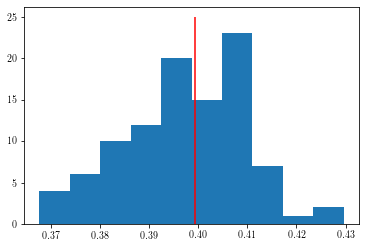

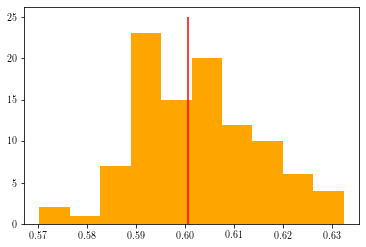

In [62]:
# Homophily-dominated : Check for the first value of the contact matrix 
v00 = [m[0,0] for m in lmA_homo_r]
plt.hist(v00,bins=10)
plt.vlines(mAge_homo_r[0,0],0,25,'r')
plt.show()

v00_inv = [m[0,0] for m in lmA_homo_inv_r]
plt.hist(v00_inv,bins=10, color='orange')
plt.vlines(mAge_homo_inv_r[0,0],0,25,'r')
plt.show()

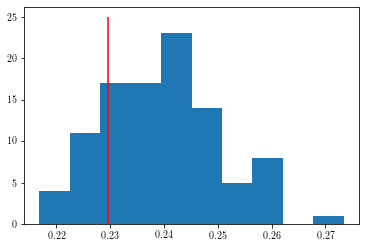

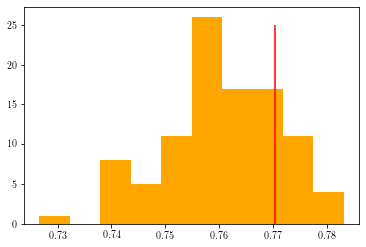

In [63]:
# Mixing : Check Exemple for the first value of the contact matrix
v00 = [m[0,0] for m in lmA_mix_r]
plt.hist(v00,bins=10)
plt.vlines(mAge_mix_r[0,0],0,25,'r')
plt.show()

v00_inv = [m[0,0] for m in lmA_mix_inv_r]
plt.hist(v00_inv,bins=10, color='orange')
plt.vlines(mAge_mix_inv_r[0,0],0,25,'r')
plt.show()

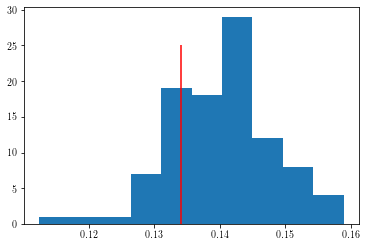

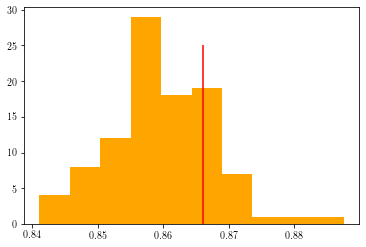

In [64]:
# Heterophily-dominated : Check Exemple for the first value of the contact matrix
v00 = [m[0,0] for m in lmA_het_r]
plt.hist(v00,bins=10)
plt.vlines(mAge_het_r[0,0],0,25,'r')
plt.show()

v00_inv = [m[0,0] for m in lmA_het_inv_r]
plt.hist(v00_inv,bins=10, color='orange')
plt.vlines(mAge_het_inv_r[0,0],0,25,'r')
plt.show()

__Plot: Random Contact Matrices of Homophily & Heterophily__ 

__1) Null-modeled Contact Matrices : Homophily-dominated__ 

homophily parameter h=0.950 
heterophily parameter ε=0.010


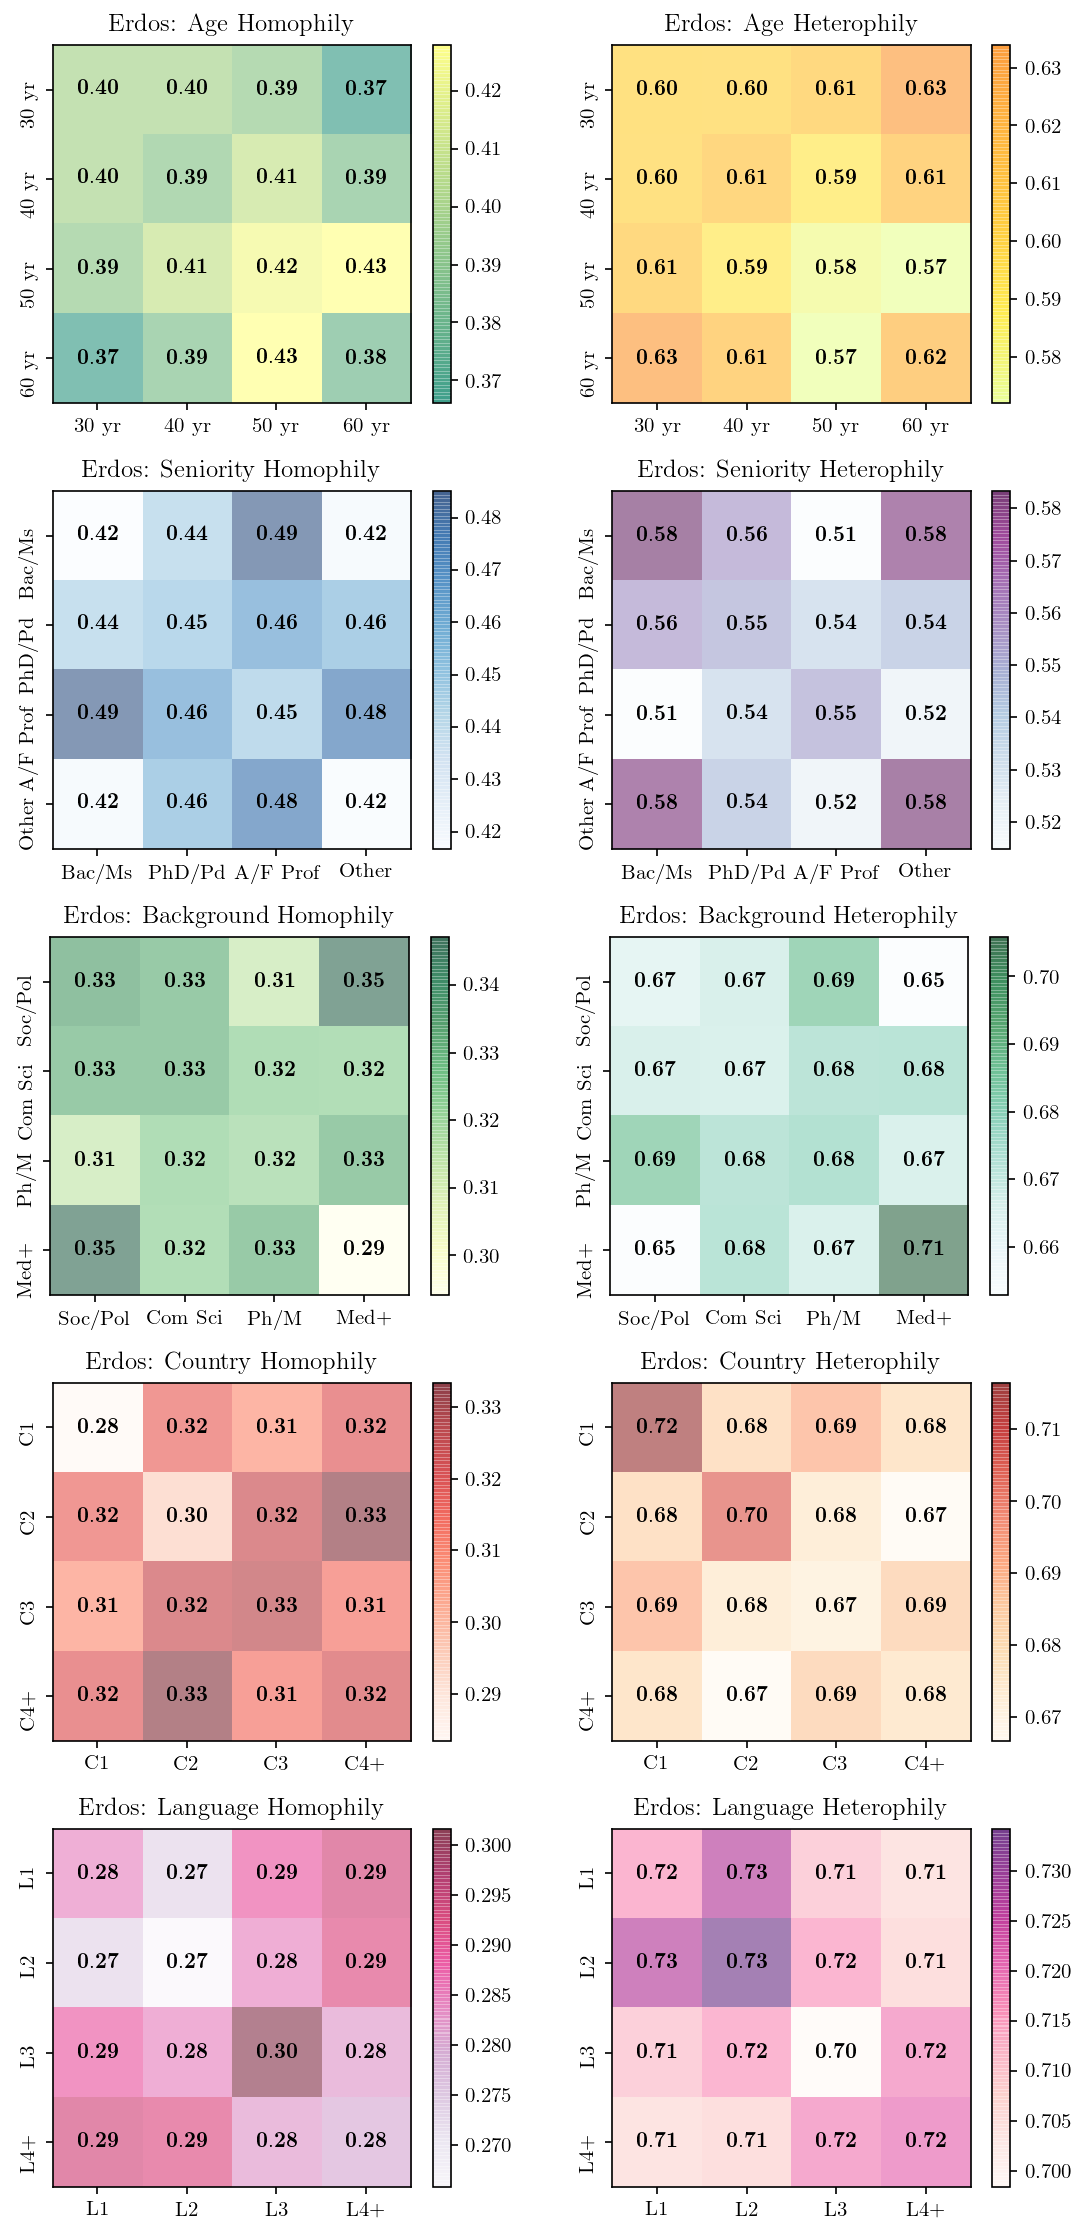

In [65]:
"""
   1) Homophily-dominated :  h = 0.95, ε = 0.01
"""    
    

"""Homophily parameters"""    
h_ab = HA(h=0.95, ε=0.01)


""" Plot HOMOPHILY  """
fig = plt.figure(figsize=(8,15), tight_layout=True, dpi=150)


""" 1.1) Age HOMOPHILY """
ax11 = plt.subplot(5,2,1)
im11 = ax11.imshow(mAge_homo_r,cmap='summer', alpha=0.5)
ax11.set_xticks(range(nA))
ax11.set_xticklabels(lAge, rotation="horizontal")
ax11.set_yticks(range(nA))
ax11.set_yticklabels(lAge, rotation="vertical")
ax11.set_title(r'Erdos: Age Homophily')
for i in range(nA):  # Loop over data dimensions and create text annotations.
    for j in range(nA):
        text = ax11.text(j, i, r'$\mathbf{%.2f}$'%mAge_homo_r[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im11, fraction=0.046, pad=0.04)


""" 1.2) Seniority HOMOPHILY """
ax12 = plt.subplot(5,2,3)
im12 = ax12.imshow(mSenior_homo_r,cmap='Blues', alpha=0.5)
ax12.set_xticks(range(nS))
ax12.set_xticklabels(lSenior, rotation="horizontal")
ax12.set_yticks(range(nS))
ax12.set_yticklabels(lSenior, rotation="vertical")
ax12.set_title(r'Erdos: Seniority Homophily')
for i in range(nS):  
    for j in range(nS):
        text = ax12.text(j, i, r'$\mathbf{%.2f}$'%mSenior_homo_r[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im12, fraction=0.046, pad=0.04)



""" 1.3) Background HOMOPHILY """
ax13 = plt.subplot(5,2,5)
im13 = ax13.imshow(mBackgr_homo_r,cmap='YlGn', alpha=0.5)
ax13.set_xticks(range(nB))
ax13.set_xticklabels(lBackgr, rotation="horizontal")
ax13.set_yticks(range(nB))
ax13.set_yticklabels(lBackgr, rotation="vertical")
ax13.set_title(r'Erdos: Background Homophily')
for i in range(nB):  
    for j in range(nB):
        text = ax13.text(j, i, r'$\mathbf{%.2f}$'%mBackgr_homo_r[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im13, fraction=0.05, pad=0.04)



""" 1.4) Country HOMOPHILY """
ax14 = plt.subplot(5,2,7)
im14 = ax14.imshow(mCountry_homo_r,cmap='Reds', alpha=0.5)
ax14.set_xticks(range(nS))
ax14.set_xticklabels(lCountry, rotation="horizontal")
ax14.set_yticks(range(nS))
ax14.set_yticklabels(lCountry, rotation="vertical")
ax14.set_title(r'Erdos: Country Homophily')
for i in range(nC):  
    for j in range(nC):
        text = ax14.text(j, i, r'$\mathbf{%.2f}$'%mCountry_homo_r[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im14, fraction=0.046, pad=0.04)




""" 1.5) Language HOMOPHILY """
ax15 = plt.subplot(5,2,9)
im15 = ax15.imshow(mLanguage_homo_r,cmap='PuRd', alpha=0.5)
ax15.set_xticks(range(nL))
ax15.set_xticklabels(lLanguage, rotation="horizontal")
ax15.set_yticks(range(nL))
ax15.set_yticklabels(lLanguage, rotation="vertical")
ax15.set_title(r'Erdos: Language Homophily')
for i in range(nL):  
    for j in range(nL):
        text = ax15.text(j, i, r'$\mathbf{%.2f}$'%mLanguage_homo_r[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im15, fraction=0.046, pad=0.04)




""" Plot HETEROPHILY """

""" 2.1) Age HETEROPHILY """
ax21 = plt.subplot(5,2,2)
im21 = ax21.imshow(mAge_homo_inv_r,cmap='Wistia', alpha=0.5)
ax21.set_xticks(range(nA))
ax21.set_xticklabels(lAge, rotation="horizontal")
ax21.set_yticks(range(nA))
ax21.set_yticklabels(lAge, rotation="vertical")
ax21.set_title(r'Erdos: Age Heterophily')
for i in range(nA): # Loop over data dimensions and create text annotations.
    for j in range(nA):
        text = ax21.text(j, i, r'$\mathbf{%.2f}$'%mAge_homo_inv_r[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im21, fraction=0.046, pad=0.04)


""" 2.2) Seniority HETEROPHILY """
ax22 = plt.subplot(5,2,4)
im22 = ax22.imshow(mSenior_homo_inv_r,cmap='BuPu', alpha=0.5)
ax22.set_xticks(range(nS))
ax22.set_xticklabels(lSenior, rotation="horizontal")
ax22.set_yticks(range(nS))
ax22.set_yticklabels(lSenior, rotation="vertical")
ax22.set_title(r'Erdos: Seniority Heterophily')
for i in range(nA): # Loop over data dimensions and create text annotations.
    for j in range(nA):
        text = ax22.text(j, i, r'$\mathbf{%.2f}$'%mSenior_homo_inv_r[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im22, fraction=0.046, pad=0.04)



""" 2.3) Background HETEROPHILY """
ax23 = plt.subplot(5,2,6)
im23 = ax23.imshow(mBackgr_homo_inv_r,cmap='BuGn', alpha=0.5)
ax23.set_xticks(range(nB))
ax23.set_xticklabels(lBackgr, rotation="horizontal")
ax23.set_yticks(range(nB))
ax23.set_yticklabels(lBackgr, rotation="vertical")
ax23.set_title(r'Erdos: Background Heterophily')
for i in range(nB):  
    for j in range(nB):
        text = ax23.text(j, i, r'$\mathbf{%.2f}$'%mBackgr_homo_inv_r[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im23, fraction=0.05, pad=0.04)




""" 2.4) Country HETEROPHILY """
ax24 = plt.subplot(5,2,8)
im24 = ax24.imshow(mCountry_homo_inv_r,cmap='OrRd', alpha=0.5)
ax24.set_xticks(range(nC))
ax24.set_xticklabels(lCountry, rotation="horizontal")
ax24.set_yticks(range(nC))
ax24.set_yticklabels(lCountry, rotation="vertical")
ax24.set_title(r'Erdos: Country Heterophily')
for i in range(nC):  
    for j in range(nC):
        text = ax24.text(j, i, r'$\mathbf{%.2f}$'%mCountry_homo_inv_r[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im24, fraction=0.046, pad=0.04)



""" 2.5) Language HETEROPHILY """
ax25 = plt.subplot(5,2,10)
im25 = ax25.imshow(mLanguage_homo_inv_r,cmap='RdPu', alpha=0.5)
ax25.set_xticks(range(nL))
ax25.set_xticklabels(lLanguage, rotation="horizontal")
ax25.set_yticks(range(nL))
ax25.set_yticklabels(lLanguage, rotation="vertical")
ax25.set_title(r'Erdos: Language Heterophily')
for i in range(nL):  
    for j in range(nL):
        text = ax25.text(j, i, r'$\mathbf{%.2f}$'%mLanguage_homo_inv_r[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im25, fraction=0.046, pad=0.04)


# plt.savefig('CM_Erdos_homo_r_ALL.pdf')
plt.show()

__2) Null-modeled Contact Matrices : Mixing__ 

homophily parameter h=0.250 
heterophily parameter ε=0.250


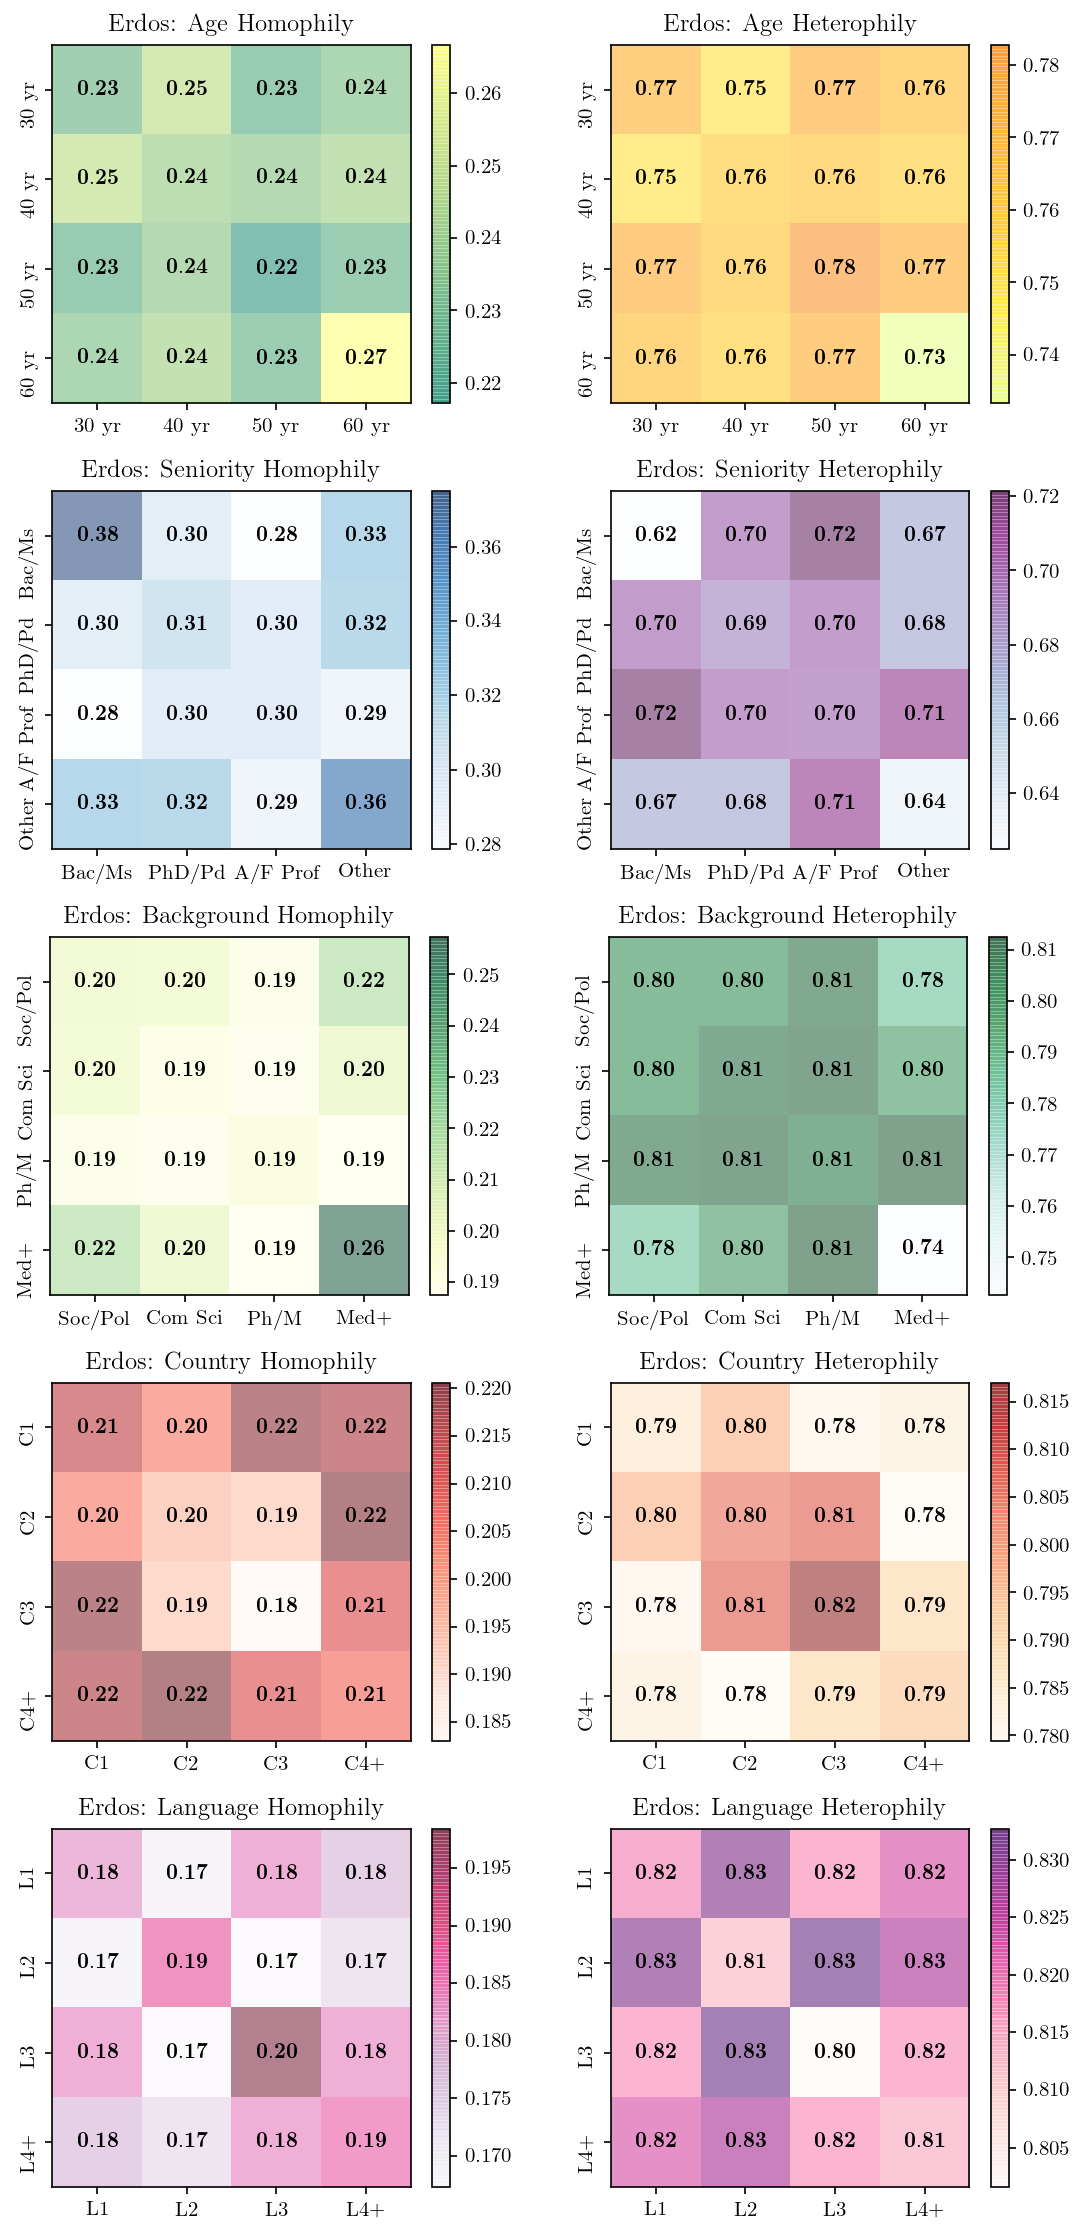

In [66]:
"""
   2) Mixing :  h = 0.25, ε = 0.25
"""    


"""Homophily parameters"""    
h_ab = HA(h=0.25, ε=0.25)


""" Plot HOMOPHILY  """
fig = plt.figure(figsize=(8,15), tight_layout=True, dpi=150)


""" 1.1) Age HOMOPHILY """
ax11 = plt.subplot(5,2,1)
im11 = ax11.imshow(mAge_mix_r,cmap='summer', alpha=0.5)
ax11.set_xticks(range(nA))
ax11.set_xticklabels(lAge, rotation="horizontal")
ax11.set_yticks(range(nA))
ax11.set_yticklabels(lAge, rotation="vertical")
ax11.set_title(r'Erdos: Age Homophily')
for i in range(nA):  # Loop over data dimensions and create text annotations.
    for j in range(nA):
        text = ax11.text(j, i, r'$\mathbf{%.2f}$'%mAge_mix_r[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im11, fraction=0.046, pad=0.04)


""" 1.2) Seniority HOMOPHILY """
ax12 = plt.subplot(5,2,3)
im12 = ax12.imshow(mSenior_mix_r,cmap='Blues', alpha=0.5)
ax12.set_xticks(range(nS))
ax12.set_xticklabels(lSenior, rotation="horizontal")
ax12.set_yticks(range(nS))
ax12.set_yticklabels(lSenior, rotation="vertical")
ax12.set_title(r'Erdos: Seniority Homophily')
for i in range(nS):  
    for j in range(nS):
        text = ax12.text(j, i, r'$\mathbf{%.2f}$'%mSenior_mix_r[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im12, fraction=0.046, pad=0.04)



""" 1.3) Background HOMOPHILY """
ax13 = plt.subplot(5,2,5)
im13 = ax13.imshow(mBackgr_mix_r,cmap='YlGn', alpha=0.5)
ax13.set_xticks(range(nB))
ax13.set_xticklabels(lBackgr, rotation="horizontal")
ax13.set_yticks(range(nB))
ax13.set_yticklabels(lBackgr, rotation="vertical")
ax13.set_title(r'Erdos: Background Homophily')
for i in range(nB):  
    for j in range(nB):
        text = ax13.text(j, i, r'$\mathbf{%.2f}$'%mBackgr_mix_r[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im13, fraction=0.05, pad=0.04)



""" 1.4) Country HOMOPHILY """
ax14 = plt.subplot(5,2,7)
im14 = ax14.imshow(mCountry_mix_r,cmap='Reds', alpha=0.5)
ax14.set_xticks(range(nS))
ax14.set_xticklabels(lCountry, rotation="horizontal")
ax14.set_yticks(range(nS))
ax14.set_yticklabels(lCountry, rotation="vertical")
ax14.set_title(r'Erdos: Country Homophily')
for i in range(nC):  
    for j in range(nC):
        text = ax14.text(j, i, r'$\mathbf{%.2f}$'%mCountry_mix_r[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im14, fraction=0.046, pad=0.04)




""" 1.5) Language HOMOPHILY """
ax15 = plt.subplot(5,2,9)
im15 = ax15.imshow(mLanguage_mix_r,cmap='PuRd', alpha=0.5)
ax15.set_xticks(range(nL))
ax15.set_xticklabels(lLanguage, rotation="horizontal")
ax15.set_yticks(range(nL))
ax15.set_yticklabels(lLanguage, rotation="vertical")
ax15.set_title(r'Erdos: Language Homophily')
for i in range(nL):  
    for j in range(nL):
        text = ax15.text(j, i, r'$\mathbf{%.2f}$'%mLanguage_mix_r[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im15, fraction=0.046, pad=0.04)




""" Plot HETEROPHILY """

""" 2.1) Age HETEROPHILY """
ax21 = plt.subplot(5,2,2)
im21 = ax21.imshow(mAge_mix_inv_r,cmap='Wistia', alpha=0.5)
ax21.set_xticks(range(nA))
ax21.set_xticklabels(lAge, rotation="horizontal")
ax21.set_yticks(range(nA))
ax21.set_yticklabels(lAge, rotation="vertical")
ax21.set_title(r'Erdos: Age Heterophily')
for i in range(nA): # Loop over data dimensions and create text annotations.
    for j in range(nA):
        text = ax21.text(j, i, r'$\mathbf{%.2f}$'%mAge_mix_inv_r[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im21, fraction=0.046, pad=0.04)


""" 2.2) Seniority HETEROPHILY """
ax22 = plt.subplot(5,2,4)
im22 = ax22.imshow(mSenior_mix_inv_r,cmap='BuPu', alpha=0.5)
ax22.set_xticks(range(nS))
ax22.set_xticklabels(lSenior, rotation="horizontal")
ax22.set_yticks(range(nS))
ax22.set_yticklabels(lSenior, rotation="vertical")
ax22.set_title(r'Erdos: Seniority Heterophily')
for i in range(nA): # Loop over data dimensions and create text annotations.
    for j in range(nA):
        text = ax22.text(j, i, r'$\mathbf{%.2f}$'%mSenior_mix_inv_r[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im22, fraction=0.046, pad=0.04)



""" 2.3) Background HETEROPHILY """
ax23 = plt.subplot(5,2,6)
im23 = ax23.imshow(mBackgr_mix_inv_r,cmap='BuGn', alpha=0.5)
ax23.set_xticks(range(nB))
ax23.set_xticklabels(lBackgr, rotation="horizontal")
ax23.set_yticks(range(nB))
ax23.set_yticklabels(lBackgr, rotation="vertical")
ax23.set_title(r'Erdos: Background Heterophily')
for i in range(nB):  
    for j in range(nB):
        text = ax23.text(j, i, r'$\mathbf{%.2f}$'%mBackgr_mix_inv_r[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im23, fraction=0.05, pad=0.04)




""" 2.4) Country HETEROPHILY """
ax24 = plt.subplot(5,2,8)
im24 = ax24.imshow(mCountry_mix_inv_r,cmap='OrRd', alpha=0.5)
ax24.set_xticks(range(nC))
ax24.set_xticklabels(lCountry, rotation="horizontal")
ax24.set_yticks(range(nC))
ax24.set_yticklabels(lCountry, rotation="vertical")
ax24.set_title(r'Erdos: Country Heterophily')
for i in range(nC):  
    for j in range(nC):
        text = ax24.text(j, i, r'$\mathbf{%.2f}$'%mCountry_mix_inv_r[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im24, fraction=0.046, pad=0.04)



""" 2.5) Language HETEROPHILY """
ax25 = plt.subplot(5,2,10)
im25 = ax25.imshow(mLanguage_mix_inv_r,cmap='RdPu', alpha=0.5)
ax25.set_xticks(range(nL))
ax25.set_xticklabels(lLanguage, rotation="horizontal")
ax25.set_yticks(range(nL))
ax25.set_yticklabels(lLanguage, rotation="vertical")
ax25.set_title(r'Erdos: Language Heterophily')
for i in range(nL):  
    for j in range(nL):
        text = ax25.text(j, i, r'$\mathbf{%.2f}$'%mLanguage_mix_inv_r[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im25, fraction=0.046, pad=0.04)


# plt.savefig('CM_Erdos_mix_r_ALL.pdf')
plt.show()

__3) Null-modeled Contact Matrices : Heterophily-dominated__ 

homophily parameter h=0.001 
heterophily parameter ε=0.333


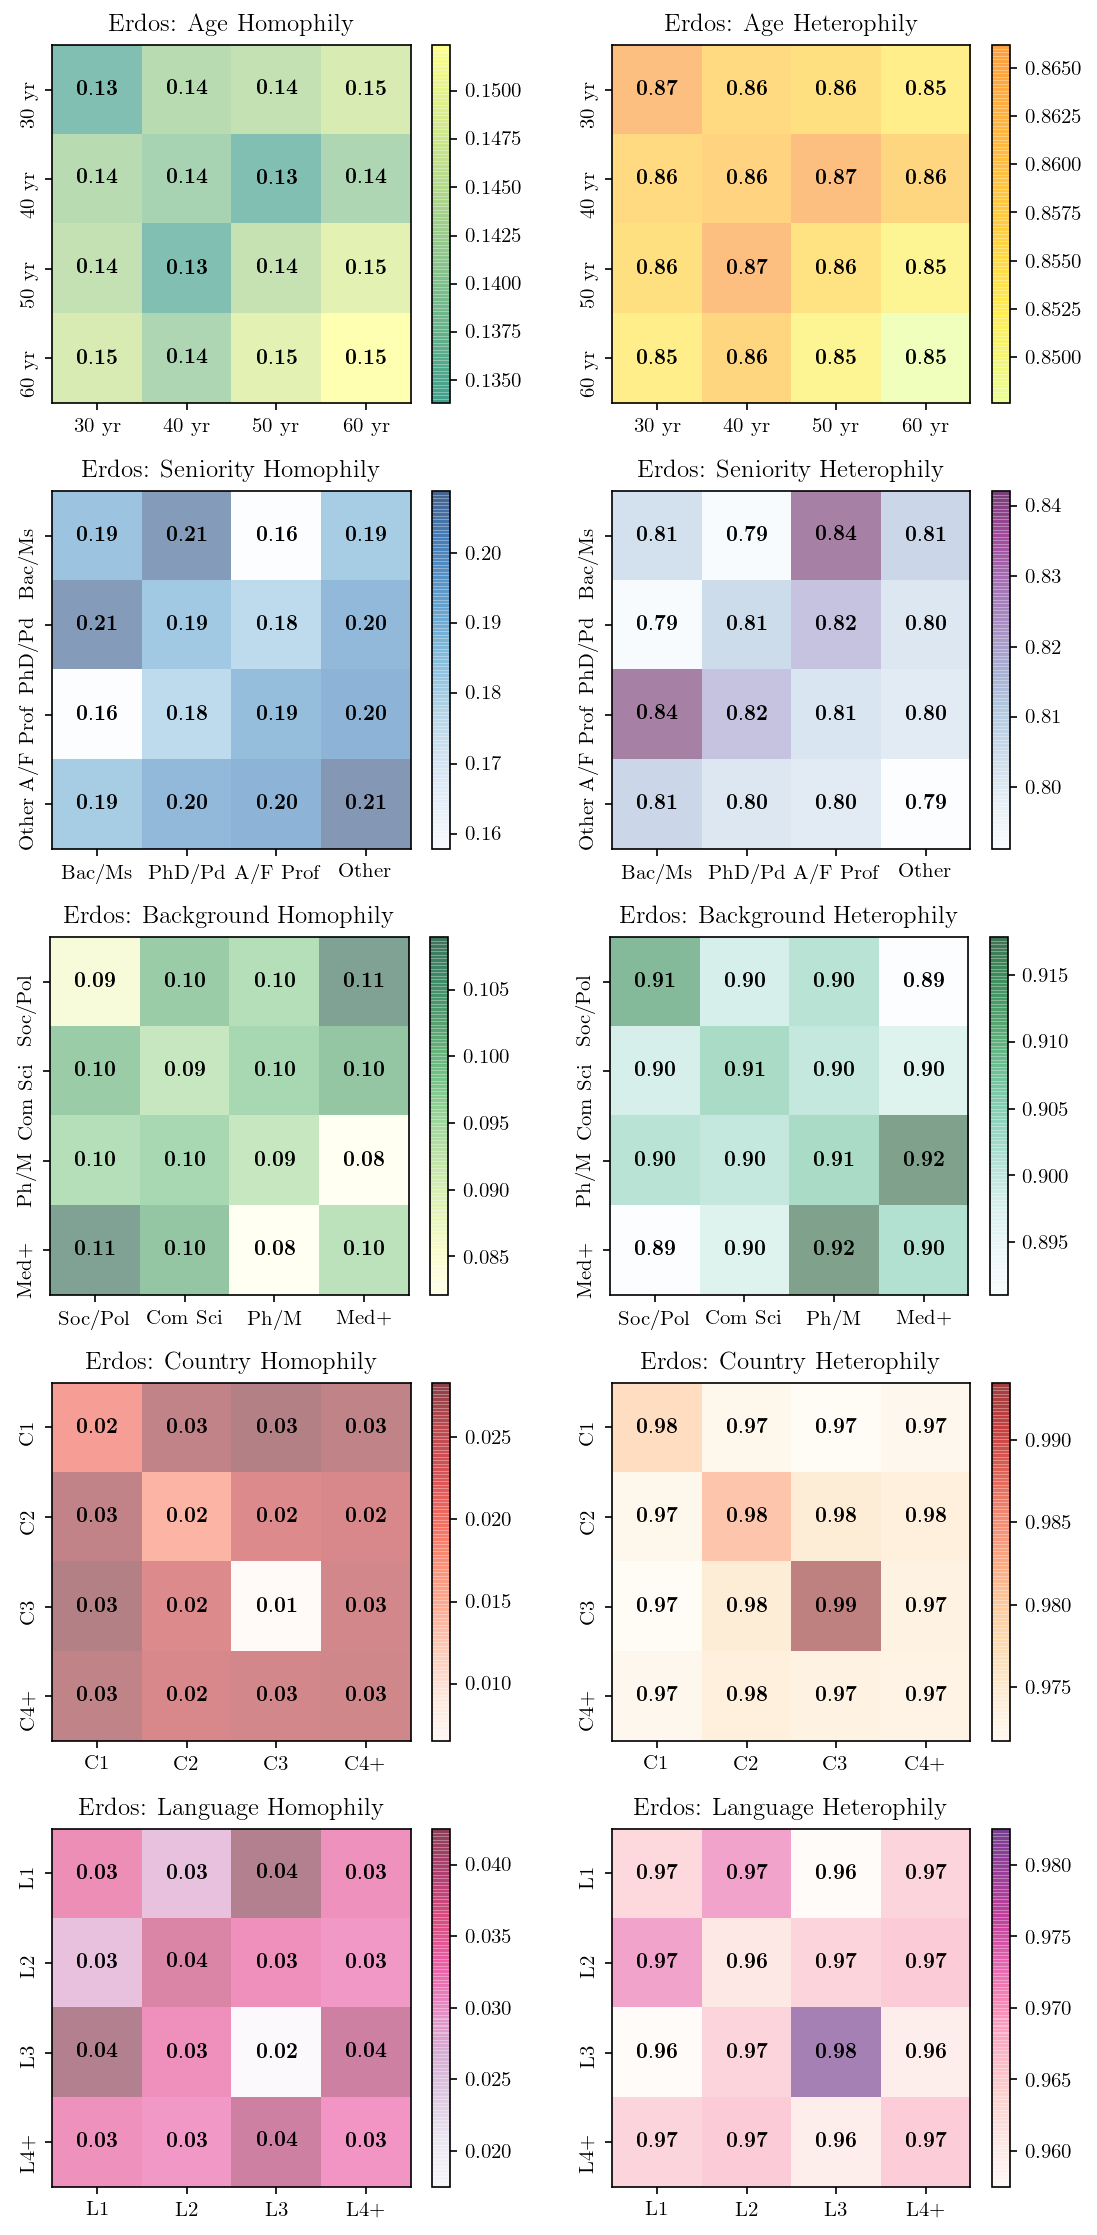

In [67]:
"""
   3) Heterophily-dominated :  h = 0.001, ε = 0.333
"""    
    

"""Homophily parameters"""    
h_ab = HA(h=0.001, ε=0.333)


""" Plot HOMOPHILY  """
fig = plt.figure(figsize=(8,15), tight_layout=True, dpi=150)


""" 1.1) Age HOMOPHILY """
ax11 = plt.subplot(5,2,1)
im11 = ax11.imshow(mAge_het_r,cmap='summer', alpha=0.5)
ax11.set_xticks(range(nA))
ax11.set_xticklabels(lAge, rotation="horizontal")
ax11.set_yticks(range(nA))
ax11.set_yticklabels(lAge, rotation="vertical")
ax11.set_title(r'Erdos: Age Homophily')
for i in range(nA):  # Loop over data dimensions and create text annotations.
    for j in range(nA):
        text = ax11.text(j, i, r'$\mathbf{%.2f}$'%mAge_het_r[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im11, fraction=0.046, pad=0.04)


""" 1.2) Seniority HOMOPHILY """
ax12 = plt.subplot(5,2,3)
im12 = ax12.imshow(mSenior_het_r,cmap='Blues', alpha=0.5)
ax12.set_xticks(range(nS))
ax12.set_xticklabels(lSenior, rotation="horizontal")
ax12.set_yticks(range(nS))
ax12.set_yticklabels(lSenior, rotation="vertical")
ax12.set_title(r'Erdos: Seniority Homophily')
for i in range(nS):  
    for j in range(nS):
        text = ax12.text(j, i, r'$\mathbf{%.2f}$'%mSenior_het_r[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im12, fraction=0.046, pad=0.04)



""" 1.3) Background HOMOPHILY """
ax13 = plt.subplot(5,2,5)
im13 = ax13.imshow(mBackgr_het_r,cmap='YlGn', alpha=0.5)
ax13.set_xticks(range(nB))
ax13.set_xticklabels(lBackgr, rotation="horizontal")
ax13.set_yticks(range(nB))
ax13.set_yticklabels(lBackgr, rotation="vertical")
ax13.set_title(r'Erdos: Background Homophily')
for i in range(nB):  
    for j in range(nB):
        text = ax13.text(j, i, r'$\mathbf{%.2f}$'%mBackgr_het_r[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im13, fraction=0.05, pad=0.04)



""" 1.4) Country HOMOPHILY """
ax14 = plt.subplot(5,2,7)
im14 = ax14.imshow(mCountry_het_r,cmap='Reds', alpha=0.5)
ax14.set_xticks(range(nS))
ax14.set_xticklabels(lCountry, rotation="horizontal")
ax14.set_yticks(range(nS))
ax14.set_yticklabels(lCountry, rotation="vertical")
ax14.set_title(r'Erdos: Country Homophily')
for i in range(nC):  
    for j in range(nC):
        text = ax14.text(j, i, r'$\mathbf{%.2f}$'%mCountry_het_r[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im14, fraction=0.046, pad=0.04)




""" 1.5) Language HOMOPHILY """
ax15 = plt.subplot(5,2,9)
im15 = ax15.imshow(mLanguage_het_r,cmap='PuRd', alpha=0.5)
ax15.set_xticks(range(nL))
ax15.set_xticklabels(lLanguage, rotation="horizontal")
ax15.set_yticks(range(nL))
ax15.set_yticklabels(lLanguage, rotation="vertical")
ax15.set_title(r'Erdos: Language Homophily')
for i in range(nL):  
    for j in range(nL):
        text = ax15.text(j, i, r'$\mathbf{%.2f}$'%mLanguage_het_r[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im15, fraction=0.046, pad=0.04)




""" Plot HETEROPHILY """

""" 2.1) Age HETEROPHILY """
ax21 = plt.subplot(5,2,2)
im21 = ax21.imshow(mAge_het_inv_r,cmap='Wistia', alpha=0.5)
ax21.set_xticks(range(nA))
ax21.set_xticklabels(lAge, rotation="horizontal")
ax21.set_yticks(range(nA))
ax21.set_yticklabels(lAge, rotation="vertical")
ax21.set_title(r'Erdos: Age Heterophily')
for i in range(nA): # Loop over data dimensions and create text annotations.
    for j in range(nA):
        text = ax21.text(j, i, r'$\mathbf{%.2f}$'%mAge_het_inv_r[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im21, fraction=0.046, pad=0.04)


""" 2.2) Seniority HETEROPHILY """
ax22 = plt.subplot(5,2,4)
im22 = ax22.imshow(mSenior_het_inv_r,cmap='BuPu', alpha=0.5)
ax22.set_xticks(range(nS))
ax22.set_xticklabels(lSenior, rotation="horizontal")
ax22.set_yticks(range(nS))
ax22.set_yticklabels(lSenior, rotation="vertical")
ax22.set_title(r'Erdos: Seniority Heterophily')
for i in range(nA): # Loop over data dimensions and create text annotations.
    for j in range(nA):
        text = ax22.text(j, i, r'$\mathbf{%.2f}$'%mSenior_het_inv_r[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im22, fraction=0.046, pad=0.04)



""" 2.3) Background HETEROPHILY """
ax23 = plt.subplot(5,2,6)
im23 = ax23.imshow(mBackgr_het_inv_r,cmap='BuGn', alpha=0.5)
ax23.set_xticks(range(nB))
ax23.set_xticklabels(lBackgr, rotation="horizontal")
ax23.set_yticks(range(nB))
ax23.set_yticklabels(lBackgr, rotation="vertical")
ax23.set_title(r'Erdos: Background Heterophily')
for i in range(nB):  
    for j in range(nB):
        text = ax23.text(j, i, r'$\mathbf{%.2f}$'%mBackgr_het_inv_r[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im23, fraction=0.05, pad=0.04)




""" 2.4) Country HETEROPHILY """
ax24 = plt.subplot(5,2,8)
im24 = ax24.imshow(mCountry_het_inv_r,cmap='OrRd', alpha=0.5)
ax24.set_xticks(range(nC))
ax24.set_xticklabels(lCountry, rotation="horizontal")
ax24.set_yticks(range(nC))
ax24.set_yticklabels(lCountry, rotation="vertical")
ax24.set_title(r'Erdos: Country Heterophily')
for i in range(nC):  
    for j in range(nC):
        text = ax24.text(j, i, r'$\mathbf{%.2f}$'%mCountry_het_inv_r[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im24, fraction=0.046, pad=0.04)



""" 2.5) Language HETEROPHILY """
ax25 = plt.subplot(5,2,10)
im25 = ax25.imshow(mLanguage_het_inv_r,cmap='RdPu', alpha=0.5)
ax25.set_xticks(range(nL))
ax25.set_xticklabels(lLanguage, rotation="horizontal")
ax25.set_yticks(range(nL))
ax25.set_yticklabels(lLanguage, rotation="vertical")
ax25.set_title(r'Erdos: Language Heterophily')
for i in range(nL):  
    for j in range(nL):
        text = ax25.text(j, i, r'$\mathbf{%.2f}$'%mLanguage_het_inv_r[i, j], weight='bold',
                       ha="center", va="center", color="k")
plt.colorbar(im25, fraction=0.046, pad=0.04)


# plt.savefig('CM_Erdos_het_r_ALL.pdf')
plt.show()

### The issue with an Erdős-Renyi reference: case of cofounded properties

 The complete randomisation of a network destroys all correlations between all properties. However, these correlations can be of diverse origins, and not necessarily come from homophily. 
 
 Indeed, some of them can be cofounded, and thus have an effect on another property of the network. In the case of homophily, one must therefore differentiate between **true homophily**, which __can only be explained by the existence of a preferential attachment related to the node attributes__, and **effective homophily**, which __results from another underlying correlation or property of the network__.

**Note:** it is in practice almost impossible to prove that a homophily effect is "true". One can only exclude potential correlations responsible for the existence of effective homophily.

 ***

## Network Analysis

__Number of Nodes & Edges__

In [68]:
G = G_A_homo  # as an example

In [69]:
N,E = G.number_of_nodes(), G.number_of_edges()
N,E

(202, 8054)

__Density__

In [70]:
rho = nx.density(G) #2.*E/N/(N-1)
rho

0.3967292251613221

__Degrees__

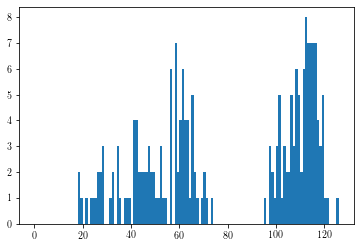

In [71]:
dK = G.degree()
lK = list(dict(dK).values())

h = plt.hist(lK,bins=range(0,max(lK)+2))
plt.show()

__Average Degree__

In [72]:
km = 2.*E/N
km

79.74257425742574

__Weight Group : Homophily parameter__

In [73]:
h_ab = HA(0.95, 0.01)
for ne in G.edges.data():
    """ne[0] == Node i     ne[1] == Node j    ne[2] == weight 
        let   'weight' =  Homophily between i & j node 
              'weight' =  h_ij
    """
#     print('#e##',ne[0], ne[1],'####')
    ne0 = ne[0]
    ne1 = ne[1]
    #### Node Group ####
    for ng in range(len(G.graph["partition"])):
        ### Nodes i ###
        for ni in G.graph["partition"][ng]:
            if ne0 == ni:
                ng_i = ng
#                 print('node_i=',ne0,'k_i=',dict(dK)[ne0],'\tgr_i=',ng_i)
        ### Nodes j ###
        for nj in G.graph["partition"][ng]:
            if ne1 == nj:
                ng_j = ng
#                 print('node_j=',ne1,'k_j=',dict(dK)[ne1],'\tgr_j=',ng_j)

    ### Homophily Matrix element ###    
#     print('Node gr=(',ng_i,ng_j,') \tHA=', h_ab[ng_i][ng_j] )
    
    ### Assign Weight  as  Homophily among gr. i & gr. j ###
    G[ne[0]][ne[1]]['weight'] = h_ab[ng_i][ng_j]
#     print('h_%i%i'%(ng_i,ng_j),'=', G[ne[0]][ne[1]]['weight'])

homophily parameter h=0.950 
heterophily parameter ε=0.010


Node gr= 0 #Node= 55 #Edge= 278 density= 0.1872053872053872
Node gr= 1 #Node= 101 #Edge= 3683 density= 0.7293069306930693
Node gr= 2 #Node= 31 #Edge= 39 density= 0.08387096774193549
Node gr= 3 #Node= 15 #Edge= 3 density= 0.02857142857142857
Edge gr=  0 1 
weight= 1.3468946894689842e-06
Edge gr=  0 2 
weight= 1.2727272727272713e-07
Edge gr=  0 3 
weight= 6.181818181818184e-08
Edge gr=  1 2 
weight= 3.110827211753381e-07
Edge gr=  1 3 
weight= 1.9537953795379413e-07
Edge gr=  2 3 
weight= 1.2258064516129039e-07


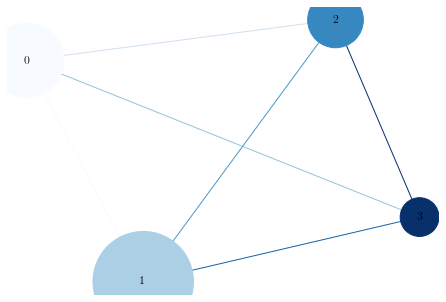

In [91]:
G_gr  = nx.quotient_graph(G, G.graph["partition"], relabel=True)

#### Node Groups ####
node_sizes = []
# labels = {}
for ng in G_gr.nodes(data=True):
    """ng[0] == Node Group     ng[1] == nnodes, nedges, density in gr"""
    print('Node gr=',ng[0]         , '#Node='  ,ng[1]["nnodes"],
          '#Edge=', ng[1]["nedges"], 'density=',ng[1]["density"])
    #### Node Size : Rescaling ####
    node_sizes.append( 100* ng[1]["nnodes"] )
#     labels[ng[1]["nnodes"]] = ng[0]
   
    
#### Edge Groups ####  
w_gr = []
for eg in G_gr.edges(data=True):
    """eg[0] == Edge Group i   eg[1] == Edge Group j
       eg[2] == Weight   (non-normalized)           """
    #### Compute  Weight gr. ####
    w = 1.0 * eg[2]["weight"]/(node_sizes[eg[0]] * node_sizes[eg[1]]) 
    w_gr.append(w)
    print('Edge gr= ',eg[0], eg[1],'\nweight=', w)

    
#### Weight Groups ####   
for ng_i in G_gr.nodes():
    for ng_j in G_gr.neighbors(ng_i):
        G_gr[ng_i][ng_j]["weight"] = w_gr[ng_i]
        

#### Rescaling Weight Groups ####   
weights = nx.get_edge_attributes(G_gr,'weight')
i = 0
for key, value in weights.items(): # key = (Edge i,j), val = weight
    weights[key] = w_gr[i]*1000  # Replace with newvalue (x Scaling factor)
    i += 1

    
nx.draw(G_gr, with_labels=True, # width=list(weights.values()),
        node_size = node_sizes,  edges=G_gr.edges(),  font_weight='bold', #G_gr.nodes.data()[1]['nnodes']
        node_color=range(G_gr.number_of_nodes()), cmap=plt.cm.Blues,
        edge_color=range(G_gr.number_of_edges()), edge_cmap= plt.cm.Blues)


__Weights (linear scale)__

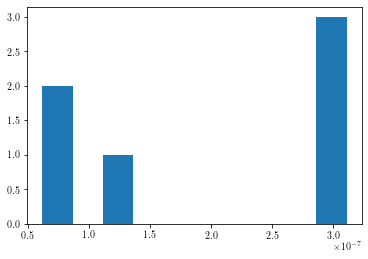

In [75]:
dW = nx.get_edge_attributes(G_gr,"weight")
lW = list(dW.values())
h = plt.hist(lW,bins=10)
plt.show()

__Strengths__

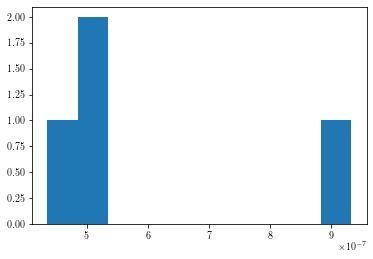

In [76]:
lS = []
for n in G_gr.nodes():
    s = 0
    for p in G_gr.neighbors(n):
        s += G_gr[n][p]["weight"]
    lS.append(s)

#linear scale
h = plt.hist(lS,bins=10)
plt.show()

#log scale
# x = 2.**np.arange(0,np.log2(max(lS))+1,0.5)
# h = np.histogram(lS,bins=x,density=True)
# plt.loglog(x[:-1],h[0],"bo")
# plt.show()

__Average shortest path length__

In [77]:
l_short_avg = nx.average_shortest_path_length(G)
l_short_avg

1.603369292153096

__Diameter of the network__

In [78]:
Dia = nx.diameter(G)
Dia

3

#### Betweenness centrality (of all nodes)

In [79]:
dB = nx.betweenness_centrality(G)
list(dict(dB).values())[:2]

[0.0008866004507415598, 0.0014698887341866986]

__Most central node__

In [80]:
most_central_node = max(dB,key=lambda x:dB[x])
most_central_node

199

__Descending Sorting of betweenness centralities__

In [81]:
list_central_nodes = sorted(dB.keys(),key=lambda x:dB[x],reverse=True)
list_central_nodes[:10]

[199, 42, 179, 68, 23, 106, 103, 145, 75, 258]

### Triangles, clustering, transitivity

__Number of triangles & Distribution of node clustering values__

In [82]:
dTri = nx.triangles(G)
nTri = sum(dTri.values())/3
nTri

128730.0

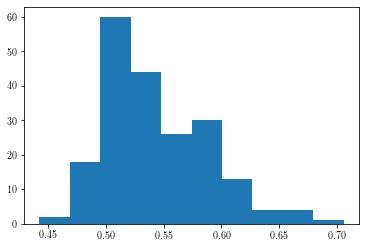

In [83]:
dC = nx.clustering(G)
lC = list(dC.values())
h = plt.hist(lC,bins=10)
plt.show()

__Transitivity__

In [84]:
tra = nx.transitivity(G)
tra

0.521797993282116

### K-cores

__Core number of all nodes__

In [85]:
G.remove_edges_from(nx.selfloop_edges(G)) ## Remove self-loop link

In [86]:
dCN = nx.core_number(G)

__Maximum k-core : kmax__

In [87]:
kG = nx.k_core(G)
KCmax = max(dCN.values())
KCmax

63

__Number of nodes and links in the maximum k-core__

In [88]:
N_kcore, E_kcore = kG.number_of_nodes(),kG.number_of_edges()
N_kcore, E_kcore

(96, 3377)

***

***

***